In [1]:
import os
import seaborn as sns
import pandas as pd
from scipy import stats
import scipy as sp
import numpy as np
import datetime as dt
%matplotlib inline
import matplotlib
# matplotlib.use('Agg')
# %matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import gridspec
from itertools import groupby
from operator import itemgetter
import bootstrap_contrast as bs
from nptdms import *
import math
from collections import Counter
import shutil
import progressbar
from svgutils.compose import *
from matplotlib.lines import Line2D
import random
import dabest
plt.rcParams['pdf.fonttype'] = 42

### Get all the metric ES and CIs to a DF

In [10]:
def collectEffectSizes(rootDirectory):
#     temp = {'ORNs':[],'Sex-Satiety-Air':[],'LightIntensity':[], 'Metric':[], 'ES':[], 'CIs':[], 'pVal':[]}
    temp = {'ORNs':[],'Sex-Satiety-Air':[],'ES':[], 'CIs':[], 'pVal':[],'LightIntensity':[], 'parent_n':[],'parent_std':[],
           'offspring_n':[],'offspring_std':[]}
    
    ornList = os.listdir(rootDirectory)
    bar = progressbar.ProgressBar()
    ## go thru the ORNs 
    for ORN in bar(ornList):
#         rootDir = os.path.join(rootDirectory,ORN)
#         metricList = next(os.walk(rootDir))[1]
        rootDir = os.path.join(rootDirectory,ORN,"Starved","weighted_TSALE","P10")
#         print ORN
        ## go thru the metrics for each ORN folder
#         for metric in metricList:
#             rootDir_metric_P10 = os.path.join(rootDir,metric,'P10')
#             files_in_metric_dir = os.listdir(rootDir_metric_P10)
        files_in_metric_dir = os.listdir(rootDir)

        os.chdir(rootDir)
            ## go thru each csv file for each metric
        for afile in files_in_metric_dir:
            if afile[-4:] == '.csv':
                conditions = afile[:-4].strip().split('_')
                sex_satiety_air = conditions[-3] + '_' + conditions[-2] + '_' + conditions[-1] 
                tempDF = pd.read_csv(afile)
                ## go thru each row in the csv files
                for row in range(len(tempDF)):
                    lightInt = tempDF['reference_group'][row].split('_')[-3]
                    ES = tempDF['stat_summary'][row]
                    CI_low = tempDF['bca_ci_low'][row]
                    CI_up = tempDF['bca_ci_high'][row]
                    
                    parent_N = tempDF['Parent_N'][row]
                    parent_STD = tempDF['Parent_SD'][row]
                    offspring_N = tempDF['Offspring_N'][row]
                    offspring_STD = tempDF['Offspring_SD'][row]
                    try:
                        p_val = tempDF['pvalue_2samp_ind_ttest'][row]
                    except:
                        p_val = np.nan                    
                    temp['ORNs'].append(ORN)
                    temp['Sex-Satiety-Air'].append(sex_satiety_air)
                    temp['LightIntensity'].append(lightInt)
#                     temp['Metric'].append(metric)
                    temp['ES'].append(ES)
                    temp['CIs'].append([CI_low,CI_up])
                    temp['pVal'].append(p_val)
                    temp['parent_n'].append(parent_N)
                    temp['parent_std'].append(parent_STD)
                    temp['offspring_n'].append(offspring_N)
                    temp['offspring_std'].append(offspring_STD)
        
#     All_ORN_EffectSizes_df = pd.DataFrame(temp,columns=['ORNs','Sex-Satiety-Air','LightIntensity', 'Metric', 'ES', 'CIs', 'pVal'])
    All_ORN_EffectSizes_df = pd.DataFrame(temp,columns=['ORNs','LightIntensity','Sex-Satiety-Air', 'ES', 'CIs', 'pVal','parent_n',
                                                       'parent_std','offspring_n','offspring_std'])

    return All_ORN_EffectSizes_df

In [11]:
All_ORN_EffectSizes_df = collectEffectSizes(rootDirectory="C:/Users/tumkayat/Desktop/ORScreening/TransferToSOD/PulseVConstantLED_ORexperiments")

100% (5 of 5) |###########################| Elapsed Time: 0:00:00 Time: 0:00:00


In [12]:
All_ORN_EffectSizes_df

,ORNs,LightIntensity,Sex-Satiety-Air,ES,CIs,pVal,parent_n,parent_std,offspring_n,offspring_std
0,Gr21a,4-65mV,fileName_Air_Constant,-0.245326,"[-0.359456481045, -0.135709366343]",4.394835e-04,128,0.504069,64,0.275696
1,Gr21a,9-3mV,fileName_Air_Constant,-0.211663,"[-0.323065276832, -0.0992157264132]",1.329663e-03,128,0.457987,64,0.316309
2,Gr21a,14mV,fileName_Air_Constant,-0.141331,"[-0.259905054527, -0.0150879794951]",3.611916e-02,128,0.452429,64,0.371608
3,Gr21a,9-3mV,fileName_Air_Pulse,-0.131295,"[-0.22719196894, -0.0352275858577]",1.002356e-02,128,0.334832,64,0.308236
4,Gr21a,18-6mV,fileName_Air_Pulse,-0.153183,"[-0.272165097968, -0.0312352383808]",9.513669e-03,128,0.352871,64,0.424809
5,Gr21a,28mV,fileName_Air_Pulse,-0.232842,"[-0.352572823493, -0.105261469121]",1.516036e-04,128,0.352103,64,0.432432
6,Gr21a,4-65mV,fileName_NoAir_Constant,-0.197988,"[-0.313953586869, -0.0805133268117]",3.178705e-03,128,0.474384,64,0.323533
7,Gr21a,9-3mV,fileName_NoAir_Constant,0.083555,"[0.000693025171079, 0.174043032855]",7.567427e-02,128,0.311530,64,0.290813
8,Gr21a,14mV,fileName_NoAir_Constant,0.079070,"[-0.0267529110354, 0.185716872]",1.442289e-01,128,0.339958,64,0.372789
9,Gr21a,9-3mV,fileName_NoAir_Pulse,-0.146106,"[-0.23815890617, -0.0480046313474]",4.289705e-03,128,0.346656,64,0.291558


In [147]:
All_ORN_EffectSizes_df['Tag'] = All_ORN_EffectSizes_df['ORNs'] + '_'+ All_ORN_EffectSizes_df['Sex-Satiety-Air'] 

a = All_ORN_EffectSizes_df[All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_fed_NoAir']
b = All_ORN_EffectSizes_df[All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_fed_Air']
c = All_ORN_EffectSizes_df[All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_starved_NoAir']
d = All_ORN_EffectSizes_df[All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_starved_Air']


print a.shape
print b.shape
print c.shape
print d.shape

(177, 7)
(177, 7)
(180, 7)
(180, 7)


In [150]:
All_ORN_EffectSizes_df.to_csv("C:/Users/tumkayat/Desktop/allData.csv")

In [115]:
## To find what is in one list but not the other
set(a['Tag']).symmetric_difference(set(b['Tag']))

{'Or24a14uW', 'Or24a42uW', 'Or24a70uW', 'Or49a14uW', 'Or49a42uW', 'Or49a70uW'}

In [187]:
All_ORN_EffectSizes_df['ORN-Intensity-Sex-Satiety-Air'].unique()

array(['Gr21a_4-65mV_fileName_Air_Constant',
       'Gr21a_9-3mV_fileName_Air_Constant',
       'Gr21a_14mV_fileName_Air_Constant',
       'Gr21a_9-3mV_fileName_Air_Pulse', 'Gr21a_18-6mV_fileName_Air_Pulse',
       'Gr21a_28mV_fileName_Air_Pulse',
       'Gr21a_4-65mV_fileName_NoAir_Constant',
       'Gr21a_9-3mV_fileName_NoAir_Constant',
       'Gr21a_14mV_fileName_NoAir_Constant',
       'Gr21a_9-3mV_fileName_NoAir_Pulse',
       'Gr21a_18-6mV_fileName_NoAir_Pulse',
       'Gr21a_28mV_fileName_NoAir_Pulse',
       'Or59c_4-65mV_fileName_Air_Constant',
       'Or59c_9-3mV_fileName_Air_Constant',
       'Or59c_14mV_fileName_Air_Constant',
       'Or59c_9-3mV_fileName_Air_Pulse', 'Or59c_18-6mV_fileName_Air_Pulse',
       'Or59c_28mV_fileName_Air_Pulse',
       'Or59c_4-65mV_fileName_NoAir_Constant',
       'Or59c_9-3mV_fileName_NoAir_Constant',
       'Or59c_14mV_fileName_NoAir_Constant',
       'Or59c_9-3mV_fileName_NoAir_Pulse',
       'Or59c_18-6mV_fileName_NoAir_Pulse',
       'Or59

### delta-delta plotting function for any given two groups

In [243]:
from math import *
def ddplot(df,colname,idx,fsize=(10,5),color='k',s=60):
    
    ## Calculate Pooled CIs
    
    def calculateSTD(mean,CI_ub,n1,n2):
        moe = abs(CI_ub - mean)
        std_and_n = moe / 1.96
        std = std_and_n / sqrt((1./n1)+(1./n2))
        return std

    ## Calculate CIs for delta-deltas
    def calculatePooledMOE(std1,std2,n1=52,n2=52):
        pooledSD = sqrt(((n1-1)*(std1**2)+(n2-1)*(std2**2))/(n1+n2-2))
        moe = 1.96 * pooledSD * sqrt((1./n1)+(1./n2))
        return moe, pooledSD

    temp = {'reference group':[], 'test group':[], 'ES':[], 'MOE':[]}

    for i in idx:
        ## get the group names to compare
        group1 = i[0]
        group2 = i[1]

        ## get Mean and calculate pooled SD of the first group
        group1_ES = df[df[col_name] == group1]['ES'].values[0]
        group1_CI_ub = df[df[col_name] == group1]['CIs'].values[0][1]
        group1_parent_n = df[df[col_name] == group1]['parent_n'].values
        group1_offspring_n = df[df[col_name] == group1]['offspring_n'].values

        group1_STD = calculateSTD(group1_ES, group1_CI_ub, group1_parent_n, group1_offspring_n)
        group1_N = (group1_parent_n + group1_offspring_n)/2.

        ## get Mean and calculate pooled SD of the second group
        group2_ES = df[df[col_name] == group2]['ES'].values[0]
        group2_CI_ub = df[df[col_name] == group2]['CIs'].values[0][1]
        group2_parent_n = df[df[col_name] == group2]['parent_n'].values
        group2_offspring_n = df[df[col_name] == group2]['offspring_n'].values

        group2_STD = calculateSTD(group2_ES, group2_CI_ub, group2_parent_n, group2_offspring_n)
        group2_N = (group2_parent_n + group2_offspring_n)/2.

        ## calculate delta-delta effect size and MOE
        deltadelta_ES = group2_ES - group1_ES

        deltadelta_MOE, deltadelta_STD = calculatePooledMOE(group1_STD, group2_STD, group1_N, group2_N)

        temp['reference group'].append(group1)
        temp['test group'].append(group2)
        temp['ES'].append(deltadelta_ES)
        temp['MOE'].append(deltadelta_MOE)
    
    fig = plt.figure(figsize=fsize)
    ax1 = fig.add_subplot(111)

    style='ticks'
    context='notebook'
    font='Arial'
    colorPalette = 'muted'
    sns.set(style=style,context =context,font=font,font_scale=1.5)
    color = color
    s = s

    x = 2

    for i in range(len(temp['ES'])):

        y = temp['ES'][i]
        ax1.scatter(x, y, color = color, s = s)
        ax1.plot([x, x], [y-temp['MOE'][0],y+temp['MOE'][0]],color=color, lw=1)
        x = x + 2

    sns.despine(ax=ax1)
    ax1.tick_params(left=True,top=False, bottom=False, right=False)    
    ax1.set_ylim(-.5,.5)
    ax1.set_xticks(range(1,2*(len(temp['ES'])),2)) ## sets the y ticks
    ax1.set_xticklabels([(i + ' V ' + j) for i in temp['reference group'] for j in temp['test group']],rotation=30, fontsize=8)  ## sets the x ticks' labels
    plt.axhline(0, color='k', lw='.5', ls='-')
    ax1.set_ylabel('delta-delta ES')
    
    stats = pd.DataFrame(temp)
    return fig, stats

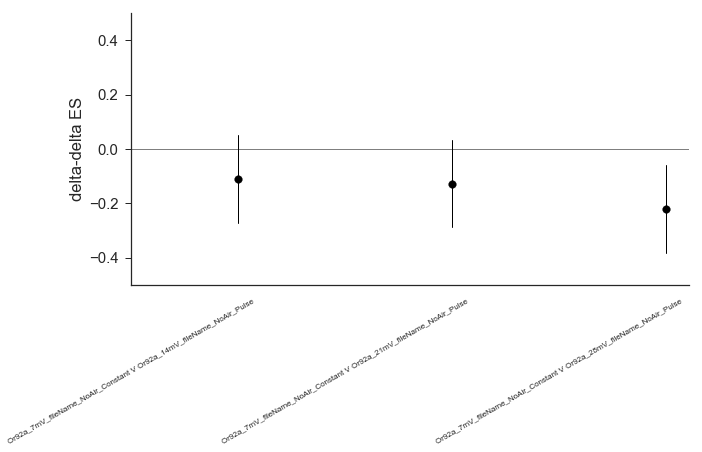

In [249]:
ORN = 'Or92a'
f, b = ddplot(df, colname = 'ORN-Intensity-Sex-Satiety-Air',
      idx = [[ORN + '_7mV_fileName_NoAir_Constant', ORN + '_14mV_fileName_NoAir_Pulse'],
             [ORN + '_14mV_fileName_NoAir_Constant', ORN + '_21mV_fileName_NoAir_Pulse'],
             [ORN + '_21mV_fileName_NoAir_Constant', ORN + '_28mV_fileName_NoAir_Pulse']])

f.savefig('/Users/tumkayat/Desktop/ORScreening/TransferToSOD/PulseVConstantLED_ORexperiments/' + ORN + '/Pulsed_v_Constant.pdf',dpi=1000,bbox_inches='tight')
b.to_csv('/Users/tumkayat/Desktop/ORScreening/TransferToSOD/PulseVConstantLED_ORexperiments/' + ORN + '/Pulsed_v_Constant.csv')

### End of delta-delta function

### Average Mean across 3-intensities and Pooling the SDs


In [76]:
from math import *
def calculatePooledMOE(data):
    sd_list = []
    for CI_pair in data:
        sd = calculateSD(CI_pair[0], CI_pair[1])
        sd_list.append(sd)
    
    pooled_moe = poolSDs(sd_list[0], sd_list[1],sd_list[2])
    return pooled_moe

def calculateSD(CI_lb ,CI_ub):
    moe = abs(CI_ub - CI_lb)
    std_and_n = moe / 1.96
    std = std_and_n / sqrt((1./104)+(1./52))
    return std

def poolSDs(std1,std2,std3,n1=52,n2=52,n3=52):
    pooledSD = sqrt(((n1-1)*(std1**2)+(n2-1)*(std2**2)+(n3-1)*(std3**2))/(n1+n2+n3-3))
    moe = 1.96 * pooledSD * sqrt((1./n1)+(1./n2)+(1./n3))
    return moe

In [81]:
temp = {'ORNs':[], 'Sex-Satiety-Air':[], 'ES_Mean':[], 'MOE_Pooled':[]}

for g,d in All_ORN_EffectSizes_df.groupby(['ORNs','Sex-Satiety-Air']):
    ORN = g[0]
    ES_Mean = d['ES'].mean()
    pooled_moe = calculatePooledMOE(d['CIs'])
    conditions = d['Sex-Satiety-Air'].iloc[0]
    
    temp['ORNs'].append(ORN)
    temp['ES_Mean'].append(ES_Mean)
    temp['MOE_Pooled'].append(pooled_moe)
    temp['Sex-Satiety-Air'].append(conditions)
    
allIntensities_PooledAverage_df = pd.DataFrame(temp)

In [82]:
allIntensities_PooledAverage_df

,ES_Mean,MOE_Pooled,ORNs,Sex-Satiety-Air
0,-0.094962,0.452226,Gr21a,male_fed_Air
1,-0.095708,0.363425,Gr21a,male_fed_NoAir
2,-0.106366,0.363431,Gr21a,male_starved_Air
3,-0.101205,0.316365,Gr21a,male_starved_NoAir
4,-0.208373,0.561460,Gr63a,male_fed_Air
5,-0.033564,0.547932,Gr63a,male_fed_NoAir
6,-0.301890,0.389696,Gr63a,male_starved_Air
7,0.031231,0.378649,Gr63a,male_starved_NoAir
8,-0.821029,0.429028,Gr66a,male_fed_Air
9,-0.667243,0.376146,Gr66a,male_fed_NoAir


### Average Mean across 3-intensities and Pooling the SDs: END

### Implementing the Empirical Bayes

In [207]:
df = pd.read_pickle("C:/Users/tumkayat/Desktop/ORScreening/All_merged_intensity_wTSALE/Gr21a/weighted_TSALE/weighted_TSALE_values.pkl")

In [208]:
df = df.assign(Sex_Satiety_Wind = pd.Series(df['Sex'] + '_' + df['Satiety'] + '_' + df['Wind status'], index = df.index))

In [6]:
Z_scores = {'Di':[], 'Si':[], 'ORNs':[], 'Sex_Satiety_Wind':[], 'LightInt':[]}

rootDirectory = "C:/Users/tumkayat/Desktop/ORScreening/All_merged_intensity_wTSALE/"
ornList = os.listdir(rootDirectory)
bar = progressbar.ProgressBar()

## go thru the ORNs
for ORN in bar(ornList):
    rootDir = os.path.join(rootDirectory, ORN, "weighted_TSALE", "weighted_TSALE_values.pkl")
    
    df = pd.read_pickle(rootDir)
    df = df.assign(Sex_Satiety_Wind = pd.Series(df['Sex'] + '_' + df['Satiety'] + '_' + df['Wind status'], index = df.index))
    
    for condition in df['Sex_Satiety_Wind'].unique():
        for intensity in df['Light Intensity(uW/mm2)'].unique():
            dfOI = df[(df['Sex_Satiety_Wind'] == condition) & (df['Light Intensity(uW/mm2)'] == intensity)] 
            ## calculate the mean difference as Offspring - Parent, since having 2 or 3 independent groups does not affect the mean
            ctrl_wTSALE = dfOI[dfOI['Status'] == 'Parent']['weighted_TSALE_P10']
            exp_wTSALE = dfOI[dfOI['Status'] == 'Offspring']['weighted_TSALE_P10']

            Di = exp_wTSALE.mean() - ctrl_wTSALE.mean()
            
            ## calculate Si for three genotypes and then get the average - different than combininb the controls
            genotypes = df['Genotype'].unique()
            
            g0_data = dfOI[dfOI['Genotype'] == genotypes[0]]['weighted_TSALE_P10']
            g1_data = dfOI[dfOI['Genotype'] == genotypes[1]]['weighted_TSALE_P10']
            g2_data = dfOI[dfOI['Genotype'] == genotypes[2]]['weighted_TSALE_P10']
            
            Si = (g0_data.std() + g1_data.std() + g2_data.std()) / 3.
            
            Z_scores['ORNs'].append(ORN)
            Z_scores['Sex_Satiety_Wind'].append(condition)
            Z_scores['LightInt'].append(intensity)
            Z_scores['Di'].append(Di)
            Z_scores['Si'].append(Si)
                     
Z_scores_df = pd.DataFrame(Z_scores)
Z_scores_df_dropna = Z_scores_df.dropna()

a0 = np.percentile(Z_scores_df_dropna['Si'], 10)
Z_scores_df_dropna['Zi'] = Z_scores_df_dropna['Di'] / (a0 + Z_scores_df_dropna['Si'])


100% (63 of 63) |#########################| Elapsed Time: 0:05:27 Time: 0:05:27
C:\Users\tumkayat\AppData\Local\Continuum\Anaconda3\envs\ipykernel_py2\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
Z_scores_df_dropna['Tag'] = Z_scores_df_dropna['ORNs'] + '_' + Z_scores_df_dropna['Sex_Satiety_Wind']

C:\Users\tumkayat\AppData\Local\Continuum\Anaconda3\envs\ipykernel_py2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [240]:
male_fed_noair = Z_scores_df_dropna[Z_scores_df_dropna['Sex_Satiety_Wind'] == 'male_fed_NoAir']

In [257]:
a0 = np.percentile(male_fed_noair['Si'], 90)
male_fed_noair['Zi'] = male_fed_noair['Di'] / (a0 + male_fed_noair['Si'])

C:\Users\tumkayat\AppData\Local\Continuum\Anaconda3\envs\ipykernel_py2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
##Drop Gr66a, EBprot blows up otherwise
a = Z_scores_df_dropna[Z_scores_df_dropna['ORNs'] != 'Gr66a']
a

,Di,LightInt,ORNs,Sex_Satiety_Wind,Si,Zi,Tag
0,0.090131,14uW,Gr21a,male_fed_NoAir,0.427006,0.120777,Gr21a_male_fed_NoAir
1,-0.243048,42uW,Gr21a,male_fed_NoAir,0.346521,-0.365060,Gr21a_male_fed_NoAir
2,-0.134207,70uW,Gr21a,male_fed_NoAir,0.345914,-0.201763,Gr21a_male_fed_NoAir
3,0.044154,14uW,Gr21a,male_fed_Air,0.523822,0.052373,Gr21a_male_fed_Air
4,-0.131724,42uW,Gr21a,male_fed_Air,0.428363,-0.176191,Gr21a_male_fed_Air
5,-0.197315,70uW,Gr21a,male_fed_Air,0.499151,-0.241097,Gr21a_male_fed_Air
6,0.078018,14uW,Gr21a,male_starved_NoAir,0.432651,0.103760,Gr21a_male_starved_NoAir
7,-0.189169,42uW,Gr21a,male_starved_NoAir,0.292172,-0.309390,Gr21a_male_starved_NoAir
8,-0.192463,70uW,Gr21a,male_starved_NoAir,0.283009,-0.319566,Gr21a_male_starved_NoAir
9,-0.037381,14uW,Gr21a,male_starved_Air,0.464686,-0.047684,Gr21a_male_starved_Air


In [19]:
a.to_csv('C:/Users/tumkayat/Desktop/allData_Z_Gr66aREMOVED_CombosADDED.csv')

In [215]:
##!!!! Calculate Z scores for stand-alone dataframes

def calculate_Z(Di, ):
    
    return

0.22573253073500413

### Implementing the Empirical Bayes: END

### Bell & Wilson Method

### Bell & Wilson Method: END

### PlotMe

In [25]:
def generateSummaryPlot(df, condition1, condition2, metric, sort_by=None, sort_by_order=None, fsize= (5,25), gap_thru_yaxis = 5, offset = 1, s =30):
    
    df_condition = df[((df['Sex-Satiety-Air'] == condition1) | (df['Sex-Satiety-Air'] == condition2)) & (df['Metric'] == metric)]

    ORs_with_both_conditions = []
    for OR in df_condition['ORNs'].unique():
        list_of_conditions_per_ORN = df_condition[df_condition['ORNs'] == OR]['Sex-Satiety-Air']

        ## if an ORN has both conditions drop one
        if (condition1 in list_of_conditions_per_ORN.values) & (condition2 in list_of_conditions_per_ORN.values):
                ORs_with_both_conditions.append(OR)

#     print 'Before dropping', df_condition.shape
    for i in ORs_with_both_conditions:
        drop_df = df_condition[(df_condition['ORNs'] == i) & (df_condition['Sex-Satiety-Air'] == condition2)]
        ind = list(drop_df.index.values)
#         print ind
        df_condition = df_condition.drop(ind)

    df_condition = df_condition.reset_index(drop=True)
#     print 'After dropping',df_condition.shape

    ## If none, will use the first df's order
    fig = plt.figure(figsize=fsize)
    ax1 = fig.add_subplot(111)
    plt.title(condition1,fontsize = 15)

    style='ticks'
    context='notebook'
    font='Arial'
    colorPalette = 'muted'
    sns.set(style=style,context =context,font=font)
    s = s
    gap_thru_yaxis = gap_thru_yaxis
    offset = offset
    i = 0

    if sort_by is None:
        ORNList_sorted = sort_by_order
        keep_the_ORN_Order = sort_by_order
        
    else:
        df_condition_sorted = df_condition[df_condition['LightIntensity'] == '70uW'].sort_values(by=['ES'],ascending=False)
        ORNList_sorted = df_condition_sorted['ORNs'].unique()
        keep_the_ORN_Order = ORNList_sorted

    y_val = np.arange(1, len(ORNList_sorted)*gap_thru_yaxis, gap_thru_yaxis)

    for OR in ORNList_sorted:
        OR_df = df_condition[df_condition['ORNs'] == OR]
        y = y_val[i] + offset

        i = i+1
    #     print OR, len(OR_df)
        for row in range(len(OR_df)):
            ES = OR_df.iloc[row]['ES']
            CIs= OR_df.iloc[row]['CIs']
            intensity = OR_df.iloc[row]['LightIntensity']

            if intensity == '14uW':
                color = sns.dark_palette("red",n_colors=3)[2]

            elif intensity == '42uW':
                color = sns.dark_palette("red",n_colors=3)[1]

            elif intensity == '70uW':
                color = sns.dark_palette("red",n_colors=3)[0]

            ax1.scatter(ES, y, color = color, s = s)
            ax1.plot([CIs[0], CIs[1]], [y,y], color = color, lw=.5)
            y = y - offset

    sns.despine(ax=ax1)
    ax1.tick_params(left=True,top=False, bottom=False, right=False)    

    ax1.set_xlim(-1.0,1.0)
    ax1.set_ylim(-1, y_val[-1]+gap_thru_yaxis)
    ax1.set_yticks(y_val)  ## sets the y ticks
    ax1.set_yticklabels(ORNList_sorted, fontsize=8)  ## sets the x ticks' labels
    plt.axvline(0,color='k',lw='0.4',ls='-')
    # ax1.set_ylabel('ORNs')
    ax1.set_xlabel('weighted TSALE',fontsize=10)
    plt.xticks(fontsize=8)

    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color = sns.dark_palette("red",n_colors=3)[2], marker = 'o', lw=1),
                    Line2D([0], [0], color = sns.dark_palette("red",n_colors=3)[1], marker = 'o', lw=1),
                    Line2D([0], [0], color = sns.dark_palette("red",n_colors=3)[0], marker = 'o', lw=1)]

    ax1.legend(custom_lines, ['14uW', '42uW', '70uW'])

    return fig, keep_the_ORN_Order

In [ ]:
All_ORN_EffectSizes_df_70_uw = All_ORN_EffectSizes_df[All_ORN_EffectSizes_df['LightIntensity'] == '70uW']

In [ ]:
All_ORN_EffectSizes_df['Sex-Satiety-Air'].unique()

In [ ]:
condition = 'male_starved_NoWind'
metric = 'weighted_TSALE'

f, ORNorder = generateSummaryPlot(All_ORN_EffectSizes_df,condition1=condition,condition2 = 'male_starved-asghar_Air',metric = metric,
                        sort_by= False, sort_by_order = order,fsize=(4,6), gap_thru_yaxis = 2, offset = 0.5, s =30)
order = ORNorder

# f.savefig("C:/Users/tumkayat/Desktop/ORScreening/ORNs_Combo/" + metric + "_" + condition + ".pdf",dpi=1000,bbox_inches='tight')


### Split the ES dataframe into positive, negative, neutral valence

In [ ]:
## Drop the GRs for other sections
drop_list = ['Gr21a','Gr66a','Gr63a']
All_ORN_EffectSizes_df = All_ORN_EffectSizes_df[~All_ORN_EffectSizes_df['ORNs'].isin(drop_list)]

In [ ]:
positive_valence = []
negative_valence = []
neutral_valence = []

temp_df = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_fed_NoAir') & (All_ORN_EffectSizes_df['Metric'] == 'weighted_TSALE')]
 
for row in range(len(temp_df)):
    ORN = temp_df.iloc[row]['ORNs']
    p = temp_df.iloc[row]['pVal']
    ES = temp_df.iloc[row]['ES']

    if p <= 0.05:
        if ES > 0:
            if not ORN in positive_valence:
                positive_valence.append(ORN)
        
        elif ES < 0:
            if not ORN in negative_valence:
                negative_valence.append(ORN)
                
for OR in temp_df['ORNs'].unique():
    if not OR in positive_valence:
        if not OR in negative_valence:
            neutral_valence.append(OR)
                
print 'Total number of ORNs:', len(temp_df['ORNs'].unique())    
print 'Total number of positive ORNs:', len(positive_valence)  
print 'Total number of negative ORNs:', len(negative_valence)
print 'Total number of neutral ORNs:', len(neutral_valence)

In [ ]:
positive_ORN_df = All_ORN_EffectSizes_df[All_ORN_EffectSizes_df['ORNs'].isin(positive_valence)]
negative_ORN_df = All_ORN_EffectSizes_df[All_ORN_EffectSizes_df['ORNs'].isin(negative_valence)]
neutral_ORN_df = All_ORN_EffectSizes_df[All_ORN_EffectSizes_df['ORNs'].isin(neutral_valence)]
print All_ORN_EffectSizes_df.shape
print positive_ORN_df.shape
print negative_ORN_df.shape
print neutral_ORN_df.shape

In [ ]:
condition1='male_fed_NoAir'
# condition2 = 'male_starved-asghar_NoAir'
metric = 'weighted_TSALE'

f, ORNorder = generateSummaryPlot(All_ORN_EffectSizes_df,condition1=condition1, condition2 = None,metric = metric,
                        sort_by = None, fsize = (5,12), gap_thru_yaxis = 3, offset = .5, s =30)

theOrder = ORNorder

f.savefig("C:/Users/tumkayat/Desktop/WALi Figures/Delete_" + metric + "_" + condition1 + ".pdf",dpi=1000,bbox_inches='tight')


## Scatter plots for pairs of conditions

In [51]:
## Or49a 14uW missing in fed_air
## Or24a 14uW missing in fed_noAir
drop_list = ['Or49a','Or24a']

for i in drop_list:
    drop_df = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['ORNs'] == i) & (All_ORN_EffectSizes_df['LightIntensity'] == "14uW")]
    ind = list(drop_df.index.values)
    print len(ind)
    All_ORN_EffectSizes_df = All_ORN_EffectSizes_df.drop(ind)
    
All_ORN_EffectSizes_df = All_ORN_EffectSizes_df.reset_index(drop=True)

3
3


In [52]:
All_ORN_EffectSizes_df

,ORNs,LightIntensity,Sex-Satiety-Air,ES,CIs,pVal
0,Gr21a,14uW,male_fed_Air,0.044154,"[-0.124728027288, 0.219820608144]",6.313749e-01
1,Gr21a,42uW,male_fed_Air,-0.131724,"[-0.278558304246, 0.0111576647961]",9.568226e-02
2,Gr21a,70uW,male_fed_Air,-0.197315,"[-0.353960390501, -0.0312941221222]",2.585454e-02
3,Gr21a,14uW,male_fed_NoAir,0.090131,"[-0.052810682, 0.2426118]",2.313336e-01
4,Gr21a,42uW,male_fed_NoAir,-0.243048,"[-0.357533068, -0.129801144]",1.223880e-04
5,Gr21a,70uW,male_fed_NoAir,-0.134207,"[-0.258868756, -0.016010688]",3.285155e-02
6,Gr21a,14uW,male_starved_Air,-0.037381,"[-0.188848060659, 0.115065616798]",6.486815e-01
7,Gr21a,42uW,male_starved_Air,-0.103921,"[-0.229281935588, 0.0106841387696]",1.203886e-01
8,Gr21a,70uW,male_starved_Air,-0.177794,"[-0.286745253629, -0.0672558665932]",4.697037e-03
9,Gr21a,14uW,male_starved_NoAir,0.078018,"[-0.0668809817526, 0.219262268978]",2.969025e-01


In [56]:
## Drop the GRs for other sections
drop_list = ['Gr21a','Gr66a','Gr63a']
All_ORN_EffectSizes_df = All_ORN_EffectSizes_df[~All_ORN_EffectSizes_df['ORNs'].isin(drop_list)]

In [122]:
## To make the lists equal drop Or49a-Or24a

## Or49a 14uW missing in fed_air
## Or24a 14uW missing in fed_noAir
drop_list = ['Or49a','Or24a']

for i in drop_list:
    drop_df = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['ORNs'] == i)]
    ind = list(drop_df.index.values)
    print len(ind)
    All_ORN_EffectSizes_df = All_ORN_EffectSizes_df.drop(ind)
    
All_ORN_EffectSizes_df = All_ORN_EffectSizes_df.reset_index(drop=True)

9
9


In [94]:
All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['ORNs'] == "Or24a") & (All_ORN_EffectSizes_df['LightIntensity'] == "14uW")]

,ORNs,LightIntensity,Sex-Satiety-Air,ES,CIs,pVal


In [98]:
All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_fed_NoAir')]

,ORNs,LightIntensity,Sex-Satiety-Air,ES,CIs,pVal
3,Gr21a,14uW,male_fed_NoAir,0.090131,"[-0.052810682, 0.2426118]",2.313336e-01
4,Gr21a,42uW,male_fed_NoAir,-0.243048,"[-0.357533068, -0.129801144]",1.223880e-04
5,Gr21a,70uW,male_fed_NoAir,-0.134207,"[-0.258868756, -0.016010688]",3.285155e-02
15,Gr63a,14uW,male_fed_NoAir,-0.025401,"[-0.206477618229, 0.179589320626]",7.615432e-01
16,Gr63a,42uW,male_fed_NoAir,-0.066340,"[-0.252694663167, 0.120737824439]",3.950045e-01
17,Gr63a,70uW,male_fed_NoAir,-0.008951,"[-0.212148570882, 0.190150055703]",9.111533e-01
27,Gr66a,14uW,male_fed_NoAir,-0.348121,"[-0.526463425943, -0.173101346203]",1.404187e-04
28,Gr66a,42uW,male_fed_NoAir,-0.742655,"[-0.855699646528, -0.634518163138]",1.156726e-21
29,Gr66a,70uW,male_fed_NoAir,-0.910952,"[-1.00212048466, -0.806053108177]",2.323757e-31
39,Or10a,14uW,male_fed_NoAir,0.074517,"[-0.102641648355, 0.252097575739]",4.040875e-01


In [123]:
# male_fed_NoAir_ES = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Metric'] == 'weighted_TSALE') & (All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_fed_NoAir')]['ES']
# male_fed_Air_ES = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Metric'] == 'weighted_TSALE') & (All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_fed_Air')]['ES']
# male_starved_NoAir_ES = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Metric'] == 'weighted_TSALE') & (All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_starved_NoAir')]['ES']
# male_starved_Air_ES = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Metric'] == 'weighted_TSALE') & (All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_starved_Air')]['ES']

# male_fed_NoAir_labels = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Metric'] == 'weighted_TSALE') & (All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_fed_NoAir')]['ORNs']
# male_fed_Air_labels = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Metric'] == 'weighted_TSALE') & (All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_fed_Air')]['ORNs']
# male_starved_NoAir_labels = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Metric'] == 'weighted_TSALE') & (All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_starved_NoAir')]['ORNs']
# male_starved_Air_labels = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Metric'] == 'weighted_TSALE') & (All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_starved_Air')]['ORNs']

# male_fed_NoAir_int = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Metric'] == 'weighted_TSALE') & (All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_fed_NoAir')]['LightIntensity']
# male_fed_Air_int = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Metric'] == 'weighted_TSALE') & (All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_fed_Air')]['LightIntensity']
# male_starved_NoAir_int = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Metric'] == 'weighted_TSALE') & (All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_starved_NoAir')]['LightIntensity']
# male_starved_Air_int = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Metric'] == 'weighted_TSALE') & (All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_starved_Air')]['LightIntensity']

male_fed_NoAir_ES = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_fed_NoAir')]['ES']
male_fed_Air_ES = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_fed_Air')]['ES']
male_starved_NoAir_ES = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_starved_NoAir')]['ES']
male_starved_Air_ES = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_starved_Air')]['ES']

male_fed_NoAir_labels = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_fed_NoAir')]['ORNs']
male_fed_Air_labels = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_fed_Air')]['ORNs']
male_starved_NoAir_labels = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_starved_NoAir')]['ORNs']
male_starved_Air_labels = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_starved_Air')]['ORNs']

male_fed_NoAir_int = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_fed_NoAir')]['LightIntensity']
male_fed_Air_int = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_fed_Air')]['LightIntensity']
male_starved_NoAir_int = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_starved_NoAir')]['LightIntensity']
male_starved_Air_int = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_starved_Air')]['LightIntensity']


In [64]:
All_ORN_EffectSizes_df

,ORNs,LightIntensity,Sex-Satiety-Air,ES,CIs,pVal
36,Or10a,14uW,male_fed_Air,0.269360,"[0.0693917804068, 0.474671369412]",1.185695e-02
37,Or10a,42uW,male_fed_Air,0.254649,"[0.0616239041968, 0.447002198624]",1.346058e-02
38,Or10a,70uW,male_fed_Air,-0.045764,"[-0.235785280375, 0.146222027164]",6.398936e-01
39,Or10a,14uW,male_fed_NoAir,0.074517,"[-0.102641648355, 0.252097575739]",4.040875e-01
40,Or10a,42uW,male_fed_NoAir,0.196138,"[0.0513060389034, 0.341898668555]",9.221166e-03
41,Or10a,70uW,male_fed_NoAir,0.114872,"[-0.0858971043242, 0.308126738792]",1.906357e-01
42,Or10a,14uW,male_starved_Air,0.169547,"[-0.00953555117258, 0.357230244185]",7.755670e-02
43,Or10a,42uW,male_starved_Air,0.200243,"[0.0403825028971, 0.362641282416]",1.923676e-02
44,Or10a,70uW,male_starved_Air,0.297882,"[0.148989445311, 0.438956109343]",5.062791e-04
45,Or10a,14uW,male_starved_NoAir,-0.104535,"[-0.225762744942, 0.0275936462714]",1.347729e-01


In [ ]:
import scipy
c1_ES = male_fed_NoAir_ES
c2_ES = male_fed_Air_ES
c3_ES = male_starved_NoAir_ES
c4_ES = male_starved_Air_ES

c1_labels = male_fed_NoAir_labels
c2_labels = male_fed_Air_labels
c3_labels = male_starved_NoAir_labels
c4_labels = male_starved_Air_labels

c1_int = male_fed_NoAir_int
c2_int = male_fed_Air_int
c3_int = male_starved_NoAir_int
c4_int = male_starved_Air_int

x = c1_ES
y = c3_ES
labels = c1_labels
lightInt = c1_int

temp = {'x':x.values, 'y':y.values, 'labels':labels.values, 'lightInt':lightInt.values}
data = pd.DataFrame.from_dict(temp)

# fig = plt.figure(figsize=(6,6))
# ax = fig.add_subplot(111)

p = sns.lmplot(x = 'x', y = 'y',legend_out=False, data = data,hue='lightInt', truncate=True,fit_reg=True, scatter_kws={"alpha" : 0.5})

# sns.regplot(x = 'x', y = 'y', data = data,truncate=True, line_kws={"color" : 'black'},scatter_kws={"alpha" : 0})

p.set(ylim = (-0.7, .7), xlim = (-0.7, .7), xlabel = 'male_fed_NoAir', ylabel = 'male_starved_NoAir')

sns.set(style="ticks")
sns.despine(trim=True)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=x, y=y)
annotation = "$\it{R-squared = %.2f}$" % (r_value**2) + "\n" + "$\it{slope = %.2f}$" % (slope) + "\n" + "$\it{p = %.2f}$" % (p_value)

# plt.text(0.7, 0.3, annotation, fontsize=15)

def label_point(df, ax):
    for i, point in df.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['labels']))

label_point(data, plt.gca())
# p.savefig("C:/Users/tumkayat/Desktop/WALi Figures/RegressionPlot_" + "5_seperate_lb" + ".pdf",dpi=1000,bbox_inches='tight')

### Paired plots

In [ ]:
df = All_ORN_EffectSizes_df[All_ORN_EffectSizes_df['Metric'] == 'weighted_TSALE']
df['abs_ES'] = abs(df['ES'])

In [ ]:
df

In [ ]:
condition = 'male_starved_NoAir'
df_fed_noair = df[df['Sex-Satiety-Air'] == condition]

In [ ]:
fig,b = bs.contrastplot(df_fed_noair, x = 'LightIntensity', y = 'abs_ES',
                                color_col= 'LightIntensity', paired = False, fig_size=(8,10),                    
                              idx = ('14uW','42uW','70uW'))

plt.title(condition)
fname = condition + '_singleIntensity'

plt.savefig("C:/Users/tumkayat/Desktop/WALi Figures/PairedPlots/SeperateIntensities/" +  fname + '.pdf',dpi=1000,bbox_inches='tight')                                    
b.to_csv("C:/Users/tumkayat/Desktop/WALi Figures/PairedPlots/SeperateIntensities/" + fname + '.csv')

In [ ]:
0.25*0.25

### Delta delta pandas df

### Last version of d-d preparation

In [13]:
## Get the tags to match different conditions across tags
All_ORN_EffectSizes_df['Tag'] = All_ORN_EffectSizes_df['ORNs'] + '_' + All_ORN_EffectSizes_df['LightIntensity']

## Fill up a single df with all the data using TAG as a reference
data = {'ORNs':[], 'LightInt':[],'male_fed_noair_ES':[], 'male_fed_air_ES':[], 'male_starved_noair_ES':[], 'male_starved_air_ES':[],
       'male_fed_noair_CIs':[], 'male_fed_air_CIs':[], 'male_starved_noair_CIs':[], 'male_starved_air_CIs':[],
       'male_fed_noair_parent_n':[],'male_fed_noair_parent_std':[],'male_fed_noair_offspring_n':[], 'male_fed_noair_offspring_std':[],
       'male_fed_air_parent_n':[],'male_fed_air_parent_std':[],'male_fed_air_offspring_n':[], 'male_fed_air_offspring_std':[],
       'male_starved_noair_parent_n':[],'male_starved_noair_parent_std':[],'male_starved_noair_offspring_n':[], 'male_starved_noair_offspring_std':[],
       'male_starved_air_parent_n':[],'male_starved_air_parent_std':[],'male_starved_air_offspring_n':[], 'male_starved_air_offspring_std':[],
        ##female
       'female_fed_noair_ES':[], 'female_fed_air_ES':[], 'female_starved_noair_ES':[], 'female_starved_air_ES':[],
       'female_fed_noair_CIs':[], 'female_fed_air_CIs':[], 'female_starved_noair_CIs':[], 'female_starved_air_CIs':[],
       'female_fed_noair_parent_n':[],'female_fed_noair_parent_std':[],'female_fed_noair_offspring_n':[], 'female_fed_noair_offspring_std':[],
       'female_fed_air_parent_n':[],'female_fed_air_parent_std':[],'female_fed_air_offspring_n':[], 'female_fed_air_offspring_std':[],
       'female_starved_noair_parent_n':[],'female_starved_noair_parent_std':[],'female_starved_noair_offspring_n':[], 'female_starved_noair_offspring_std':[],
       'female_starved_air_parent_n':[],'female_starved_air_parent_std':[],'female_starved_air_offspring_n':[], 'female_starved_air_offspring_std':[]}
        
for tag in All_ORN_EffectSizes_df['Tag'].unique():
    dfOI = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Tag'] == tag)]
    
    ## Get the ES
    if dfOI[dfOI['Sex-Satiety-Air'] == 'male_fed_NoAir']['ES'].values:
        data['male_fed_noair_ES'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'male_fed_NoAir']['ES'].values[0])
        data['male_fed_noair_parent_n'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'male_fed_NoAir']['parent_n'].values[0])
        data['male_fed_noair_parent_std'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'male_fed_NoAir']['parent_std'].values[0])
        data['male_fed_noair_offspring_n'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'male_fed_NoAir']['offspring_n'].values[0])
        data['male_fed_noair_offspring_std'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'male_fed_NoAir']['offspring_std'].values[0])
       
    else:
        data['male_fed_noair_ES'].append(np.nan)
        data['male_fed_noair_parent_n'].append(np.nan)
        data['male_fed_noair_parent_std'].append(np.nan)
        data['male_fed_noair_offspring_n'].append(np.nan)
        data['male_fed_noair_offspring_std'].append(np.nan)
        
    if dfOI[dfOI['Sex-Satiety-Air'] == 'male_fed_Air']['ES'].values:
        data['male_fed_air_ES'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'male_fed_Air']['ES'].values[0])
        data['male_fed_air_parent_n'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'male_fed_Air']['parent_n'].values[0])
        data['male_fed_air_parent_std'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'male_fed_Air']['parent_std'].values[0])
        data['male_fed_air_offspring_n'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'male_fed_Air']['offspring_n'].values[0])
        data['male_fed_air_offspring_std'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'male_fed_Air']['offspring_std'].values[0])
                                                          
    else:
        data['male_fed_air_ES'].append(np.nan)
        data['male_fed_air_parent_n'].append(np.nan)
        data['male_fed_air_parent_std'].append(np.nan)
        data['male_fed_air_offspring_n'].append(np.nan)
        data['male_fed_air_offspring_std'].append(np.nan)
                                                      
    if dfOI[dfOI['Sex-Satiety-Air'] == 'male_starved_NoAir']['ES'].values:
        data['male_starved_noair_ES'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'male_starved_NoAir']['ES'].values[0])
        data['male_starved_noair_parent_n'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'male_starved_NoAir']['parent_n'].values[0])
        data['male_starved_noair_parent_std'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'male_starved_NoAir']['parent_std'].values[0])
        data['male_starved_noair_offspring_n'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'male_starved_NoAir']['offspring_n'].values[0])
        data['male_starved_noair_offspring_std'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'male_starved_NoAir']['offspring_std'].values[0])
        
        
    else:
        data['male_starved_noair_ES'].append(np.nan)
        data['male_starved_noair_parent_n'].append(np.nan)
        data['male_starved_noair_parent_std'].append(np.nan)
        data['male_starved_noair_offspring_n'].append(np.nan)
        data['male_starved_noair_offspring_std'].append(np.nan)
        
    if dfOI[dfOI['Sex-Satiety-Air'] == 'male_starved_Air']['ES'].values:
        data['male_starved_air_ES'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'male_starved_Air']['ES'].values[0])
        data['male_starved_air_parent_n'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'male_starved_Air']['parent_n'].values[0])
        data['male_starved_air_parent_std'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'male_starved_Air']['parent_std'].values[0])
        data['male_starved_air_offspring_n'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'male_starved_Air']['offspring_n'].values[0])
        data['male_starved_air_offspring_std'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'male_starved_Air']['offspring_std'].values[0])
        
        
    else:
        data['male_starved_air_ES'].append(np.nan)
        data['male_starved_air_parent_n'].append(np.nan)
        data['male_starved_air_parent_std'].append(np.nan)
        data['male_starved_air_offspring_n'].append(np.nan)
        data['male_starved_air_offspring_std'].append(np.nan)
                
    ## Get the ES FEMALE
    if dfOI[dfOI['Sex-Satiety-Air'] == 'female_fed_NoAir']['ES'].values:
               
        ## female
        data['female_fed_noair_ES'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'female_fed_NoAir']['ES'].values[0])
        data['female_fed_noair_parent_n'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'female_fed_NoAir']['parent_n'].values[0])
        data['female_fed_noair_parent_std'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'female_fed_NoAir']['parent_std'].values[0])
        data['female_fed_noair_offspring_n'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'female_fed_NoAir']['offspring_n'].values[0])
        data['female_fed_noair_offspring_std'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'female_fed_NoAir']['offspring_std'].values[0])
    else:
                  
        ## female                                              
        data['female_fed_noair_ES'].append(np.nan)
        data['female_fed_noair_parent_n'].append(np.nan)
        data['female_fed_noair_parent_std'].append(np.nan)
        data['female_fed_noair_offspring_n'].append(np.nan)
        data['female_fed_noair_offspring_std'].append(np.nan)
        
    if dfOI[dfOI['Sex-Satiety-Air'] == 'female_fed_Air']['ES'].values:
                
        ## female
        data['female_fed_air_ES'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'female_fed_Air']['ES'].values[0])
        data['female_fed_air_parent_n'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'female_fed_Air']['parent_n'].values[0])
        data['female_fed_air_parent_std'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'female_fed_Air']['parent_std'].values[0])
        data['female_fed_air_offspring_n'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'female_fed_Air']['offspring_n'].values[0])
        data['female_fed_air_offspring_std'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'female_fed_Air']['offspring_std'].values[0])                                              
                                                      
    else:
        
        ## female                                           
        data['female_fed_air_ES'].append(np.nan)
        data['female_fed_air_parent_n'].append(np.nan)
        data['female_fed_air_parent_std'].append(np.nan)
        data['female_fed_air_offspring_n'].append(np.nan)
        data['female_fed_air_offspring_std'].append(np.nan)
        
    if dfOI[dfOI['Sex-Satiety-Air'] == 'female_starved_NoAir']['ES'].values:
        
        ## female
        data['female_starved_noair_ES'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'female_starved_NoAir']['ES'].values[0])
        data['female_starved_noair_parent_n'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'female_starved_NoAir']['parent_n'].values[0])
        data['female_starved_noair_parent_std'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'female_starved_NoAir']['parent_std'].values[0])
        data['female_starved_noair_offspring_n'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'female_starved_NoAir']['offspring_n'].values[0])
        data['female_starved_noair_offspring_std'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'female_starved_NoAir']['offspring_std'].values[0])                                            
    else:
        
        ## female                                            
        data['female_starved_noair_ES'].append(np.nan)
        data['female_starved_noair_parent_n'].append(np.nan)
        data['female_starved_noair_parent_std'].append(np.nan)
        data['female_starved_noair_offspring_n'].append(np.nan)
        data['female_starved_noair_offspring_std'].append(np.nan)                                            

    if dfOI[dfOI['Sex-Satiety-Air'] == 'female_starved_Air']['ES'].values:
        
        ## female                                             
        data['female_starved_air_ES'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'female_starved_Air']['ES'].values[0])
        data['female_starved_air_parent_n'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'female_starved_Air']['parent_n'].values[0])
        data['female_starved_air_parent_std'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'female_starved_Air']['parent_std'].values[0])
        data['female_starved_air_offspring_n'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'female_starved_Air']['offspring_n'].values[0])
        data['female_starved_air_offspring_std'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'female_starved_Air']['offspring_std'].values[0])                                             
    else:
        
        ## female                                            
        data['female_starved_air_ES'].append(np.nan)
        data['female_starved_air_parent_n'].append(np.nan)
        data['female_starved_air_parent_std'].append(np.nan)
        data['female_starved_air_offspring_n'].append(np.nan)
        data['female_starved_air_offspring_std'].append(np.nan)        
                
    ## Get the CIs   
    if dfOI[dfOI['Sex-Satiety-Air'] == 'male_fed_NoAir']['CIs'].values:
        data['male_fed_noair_CIs'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'male_fed_NoAir']['CIs'].values[0])
    else:
        data['male_fed_noair_CIs'].append(np.nan)
        
    if dfOI[dfOI['Sex-Satiety-Air'] == 'male_fed_Air']['CIs'].values:
        data['male_fed_air_CIs'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'male_fed_Air']['CIs'].values[0])
    else:
        data['male_fed_air_CIs'].append(np.nan)
        
    if dfOI[dfOI['Sex-Satiety-Air'] == 'male_starved_NoAir']['CIs'].values:
        data['male_starved_noair_CIs'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'male_starved_NoAir']['CIs'].values[0])
    else:
        data['male_starved_noair_CIs'].append(np.nan)

    if dfOI[dfOI['Sex-Satiety-Air'] == 'male_starved_Air']['CIs'].values:
        data['male_starved_air_CIs'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'male_starved_Air']['CIs'].values[0])
    else:
        data['male_starved_air_CIs'].append(np.nan)
                                                    
    ## Get the CIs FEMALE                                                
    if dfOI[dfOI['Sex-Satiety-Air'] == 'female_fed_NoAir']['CIs'].values:
        data['female_fed_noair_CIs'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'female_fed_NoAir']['CIs'].values[0])
    else:
        data['female_fed_noair_CIs'].append(np.nan)
        
    if dfOI[dfOI['Sex-Satiety-Air'] == 'female_fed_Air']['CIs'].values:
        data['female_fed_air_CIs'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'female_fed_Air']['CIs'].values[0])
    else:
        data['female_fed_air_CIs'].append(np.nan)
        
    if dfOI[dfOI['Sex-Satiety-Air'] == 'female_starved_NoAir']['CIs'].values:
        data['female_starved_noair_CIs'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'female_starved_NoAir']['CIs'].values[0])
    else:
        data['female_starved_noair_CIs'].append(np.nan)

    if dfOI[dfOI['Sex-Satiety-Air'] == 'female_starved_Air']['CIs'].values:
        data['female_starved_air_CIs'].append(dfOI[dfOI['Sex-Satiety-Air'] == 'female_starved_Air']['CIs'].values[0])
    else:
        data['female_starved_air_CIs'].append(np.nan) 
                                                                                                   
    data['ORNs'].append(tag.split('_')[0])
    data['LightInt'].append(tag.split('_')[1])
#     data['parent_n'].append(dfOI)
    

deltadelta_df = pd.DataFrame(data)    
### Calculate delta-deltas

# Wind
deltadelta_df['male_fed_air_V_male_fed_noair_ES'] = deltadelta_df['male_fed_air_ES'] - deltadelta_df['male_fed_noair_ES']
deltadelta_df['male_starved_air_V_male_starved_noair_ES'] = deltadelta_df['male_starved_air_ES'] - deltadelta_df['male_starved_noair_ES']

# Starvation
deltadelta_df['male_fed_noair_V_male_starved_noair_ES'] = deltadelta_df['male_starved_noair_ES'] - deltadelta_df['male_fed_noair_ES']
deltadelta_df['male_fed_air_V_male_starved_air_ES'] = deltadelta_df['male_starved_air_ES'] - deltadelta_df['male_fed_air_ES']

# Sex
deltadelta_df['female_fed_noair_V_male_fed_noair_ES'] = deltadelta_df['female_fed_noair_ES'] - deltadelta_df['male_fed_noair_ES']
deltadelta_df['female_fed_air_V_male_fed_air_ES'] = deltadelta_df['female_fed_air_ES'] - deltadelta_df['male_fed_air_ES']
deltadelta_df['female_starved_noair_V_male_starved_noair_ES'] = deltadelta_df['female_starved_noair_ES'] - deltadelta_df['male_starved_noair_ES']
deltadelta_df['female_starved_air_V_male_starved_air_ES'] = deltadelta_df['female_starved_air_ES'] - deltadelta_df['male_starved_air_ES']                                                   
                                                    
## Calculate Pooled CIs
from math import *
def calculateSTD(mean,CI_ub,n1,n2):
    moe = abs(CI_ub - mean)
    std_and_n = moe / 1.96
    std = std_and_n / sqrt((1./n1)+(1./n2))
    return std

## Calculate CIs for delta-deltas
def calculatePooledMOE(std1,std2,n1=52,n2=52):
    pooledSD = sqrt(((n1-1)*(std1**2)+(n2-1)*(std2**2))/(n1+n2-2))
    moe = 1.96 * pooledSD * sqrt((1./n1)+(1./n2))
    return moe, pooledSD

male_fed_air_V_male_fed_noair_CIs = []
male_starved_air_V_male_starved_noair_CIs = []
male_fed_noair_V_male_starved_noair_CIs = []
male_fed_air_V_male_starved_air_CIs = []
##female
female_fed_noair_V_male_fed_noair_CIs = []                                                  
female_fed_air_V_male_fed_air_CIs = []                                                   
female_starved_noair_V_male_starved_noair_CIs = []
female_starved_air_V_male_starved_air_CIs = []                                                   
                                                    
male_fed_air_V_male_fed_noair_pooledSD_list = []
male_starved_air_V_male_starved_noair_pooledSD_list = []
male_fed_noair_V_male_starved_noair_pooledSD_list = []
male_fed_air_V_male_starved_air_pooledSD_list = []
##female
female_fed_noair_V_male_fed_noair_pooledSD_list = []                                                  
female_fed_air_V_male_fed_air_pooledSD_list = []                                                   
female_starved_noair_V_male_starved_noair_pooledSD_list = []
female_starved_air_V_male_starved_air_pooledSD_list = []                                                     

for row in range(deltadelta_df.shape[0]):
    ## calculate pooled CIs if ES is not nan
    if not np.isnan(deltadelta_df['male_fed_noair_ES'].iloc[row]):
        # Wind
        ## Calculate the STDs for each delta-effect size
        male_fed_noair_std = calculateSTD(deltadelta_df['male_fed_noair_ES'].iloc[row], deltadelta_df['male_fed_noair_CIs'].iloc[row][1],
                                         deltadelta_df['male_fed_noair_parent_n'].iloc[row],deltadelta_df['male_fed_noair_offspring_n'].iloc[row])

        male_fed_air_std = calculateSTD(deltadelta_df['male_fed_air_ES'].iloc[row], deltadelta_df['male_fed_air_CIs'].iloc[row][1],
                                         deltadelta_df['male_fed_air_parent_n'].iloc[row],deltadelta_df['male_fed_air_offspring_n'].iloc[row])

        ## Get the pooled sample size for delta-effect size
        male_fed_noair_pooled_N = (deltadelta_df['male_fed_noair_parent_n'].iloc[row] + deltadelta_df['male_fed_noair_offspring_n'].iloc[row])/2.
        male_fed_air_pooled_N = (deltadelta_df['male_fed_air_parent_n'].iloc[row] + deltadelta_df['male_fed_air_offspring_n'].iloc[row])/2.

        ## Calculate the pooled CIs

        male_fed_air_V_male_fed_noair_moe, male_fed_air_V_male_fed_noair_pooledSD = calculatePooledMOE(male_fed_noair_std, male_fed_air_std, male_fed_noair_pooled_N, male_fed_air_pooled_N)
        male_fed_air_V_male_fed_noair_CIs.append([deltadelta_df['male_fed_air_V_male_fed_noair_ES'].iloc[row] - male_fed_air_V_male_fed_noair_moe,
                                                 deltadelta_df['male_fed_air_V_male_fed_noair_ES'].iloc[row] + male_fed_air_V_male_fed_noair_moe])

        male_fed_air_V_male_fed_noair_pooledSD_list.append(male_fed_air_V_male_fed_noair_pooledSD)
        
        ## Calculate the STDs for each delta-effect size
        male_starved_noair_std = calculateSTD(deltadelta_df['male_starved_noair_ES'][row], deltadelta_df['male_starved_noair_CIs'][row][1],
                                         deltadelta_df['male_starved_noair_parent_n'][row],deltadelta_df['male_starved_noair_offspring_n'][row])

        male_starved_air_std = calculateSTD(deltadelta_df['male_starved_air_ES'][row], deltadelta_df['male_starved_air_CIs'][row][1],
                                         deltadelta_df['male_starved_air_parent_n'][row],deltadelta_df['male_starved_air_offspring_n'][row])

        ## Get the pooled sample size for delta-effect size
        male_starved_noair_pooled_N = (deltadelta_df['male_starved_noair_parent_n'][row] + deltadelta_df['male_starved_noair_offspring_n'][row])/2.
        male_starved_air_pooled_N = (deltadelta_df['male_starved_air_parent_n'][row] + deltadelta_df['male_starved_air_offspring_n'][row])/2.

        ## Calculate the pooled CIs
        male_starved_air_V_male_starved_noair_moe, male_starved_air_V_male_starved_noair_pooledSD = calculatePooledMOE(male_starved_noair_std, male_starved_air_std, male_starved_noair_pooled_N, male_starved_air_pooled_N)
        male_starved_air_V_male_starved_noair_CIs.append([deltadelta_df['male_starved_air_V_male_starved_noair_ES'][row] - male_starved_air_V_male_starved_noair_moe,
                                                 deltadelta_df['male_starved_air_V_male_starved_noair_ES'][row] + male_starved_air_V_male_starved_noair_moe])
        
        male_starved_air_V_male_starved_noair_pooledSD_list.append(male_starved_air_V_male_starved_noair_pooledSD)
        # Starvation
        ## Calculate the STDs for each delta-effect size
        male_fed_noair_std = calculateSTD(deltadelta_df['male_fed_noair_ES'][row], deltadelta_df['male_fed_noair_CIs'][row][1],
                                         deltadelta_df['male_fed_noair_parent_n'][row],deltadelta_df['male_fed_noair_offspring_n'][row])

        male_starved_noair_std = calculateSTD(deltadelta_df['male_starved_noair_ES'][row], deltadelta_df['male_starved_noair_CIs'][row][1],
                                         deltadelta_df['male_starved_noair_parent_n'][row],deltadelta_df['male_starved_noair_offspring_n'][row])

        ## Get the pooled sample size for delta-effect size
        male_fed_noair_pooled_N = (deltadelta_df['male_fed_noair_parent_n'][row] + deltadelta_df['male_fed_noair_offspring_n'][row])/2.
        male_starved_noair_pooled_N = (deltadelta_df['male_starved_noair_parent_n'][row] + deltadelta_df['male_starved_noair_offspring_n'][row])/2.

        ## Calculate the pooled CIs
        male_fed_noair_V_male_starved_noair_moe, male_fed_noair_V_male_starved_noair_pooledSD = calculatePooledMOE(male_fed_noair_std, male_starved_noair_std, male_fed_noair_pooled_N, male_starved_noair_pooled_N)
        male_fed_noair_V_male_starved_noair_CIs.append([deltadelta_df['male_fed_noair_V_male_starved_noair_ES'][row] - male_fed_noair_V_male_starved_noair_moe,
                                                 deltadelta_df['male_fed_noair_V_male_starved_noair_ES'][row] + male_fed_noair_V_male_starved_noair_moe])

        male_fed_noair_V_male_starved_noair_pooledSD_list.append(male_fed_noair_V_male_starved_noair_pooledSD)
        
        ## Calculate the STDs for each delta-effect size
        male_fed_air_std = calculateSTD(deltadelta_df['male_fed_air_ES'][row], deltadelta_df['male_fed_air_CIs'][row][1],
                                         deltadelta_df['male_fed_air_parent_n'][row],deltadelta_df['male_fed_air_offspring_n'][row])

        male_starved_air_std = calculateSTD(deltadelta_df['male_starved_air_ES'][row], deltadelta_df['male_starved_air_CIs'][row][1],
                                         deltadelta_df['male_starved_air_parent_n'][row],deltadelta_df['male_starved_air_offspring_n'][row])

        ## Get the pooled sample size for delta-effect size
        male_fed_air_pooled_N = (deltadelta_df['male_fed_air_parent_n'][row] + deltadelta_df['male_fed_air_offspring_n'][row])/2.
        male_starved_air_pooled_N = (deltadelta_df['male_starved_air_parent_n'][row] + deltadelta_df['male_starved_air_offspring_n'][row])/2.

        ## Calculate the pooled CIs
        male_fed_air_V_male_starved_air_moe, male_fed_air_V_male_starved_air_pooledSD = calculatePooledMOE(male_fed_air_std, male_starved_air_std, male_fed_air_pooled_N, male_starved_air_pooled_N)
        male_fed_air_V_male_starved_air_CIs.append([deltadelta_df['male_fed_air_V_male_starved_air_ES'][row] - male_fed_air_V_male_starved_air_moe,
                                                 deltadelta_df['male_fed_air_V_male_starved_air_ES'][row] + male_fed_air_V_male_starved_air_moe])
        
        male_fed_air_V_male_starved_air_pooledSD_list.append(male_fed_air_V_male_starved_air_pooledSD)
    else:
        male_fed_air_V_male_fed_noair_CIs.append(np.nan)
        male_starved_air_V_male_starved_noair_CIs.append(np.nan)
        male_fed_noair_V_male_starved_noair_CIs.append(np.nan)
        male_fed_air_V_male_starved_air_CIs.append(np.nan) 
        
        male_fed_air_V_male_fed_noair_pooledSD_list.append(np.nan)
        male_starved_air_V_male_starved_noair_pooledSD_list.append(np.nan)
        male_fed_noair_V_male_starved_noair_pooledSD_list.append(np.nan)
        male_fed_air_V_male_starved_air_pooledSD_list.append(np.nan)
    
    ## female                                                
    if not np.isnan(deltadelta_df['female_fed_noair_ES'].iloc[row]):
        # Sex
        ## Calculate the STDs for each delta-effect size
        female_fed_noair_std = calculateSTD(deltadelta_df['female_fed_noair_ES'].iloc[row], deltadelta_df['female_fed_noair_CIs'].iloc[row][1],
                                         deltadelta_df['female_fed_noair_parent_n'].iloc[row],deltadelta_df['female_fed_noair_offspring_n'].iloc[row])

        male_fed_noair_std = calculateSTD(deltadelta_df['male_fed_noair_ES'].iloc[row], deltadelta_df['male_fed_noair_CIs'].iloc[row][1],
                                         deltadelta_df['male_fed_noair_parent_n'].iloc[row],deltadelta_df['male_fed_noair_offspring_n'].iloc[row])

        ## Get the pooled sample size for delta-effect size
        female_fed_noair_pooled_N = (deltadelta_df['female_fed_noair_parent_n'].iloc[row] + deltadelta_df['female_fed_noair_offspring_n'].iloc[row])/2.
        male_fed_noair_pooled_N = (deltadelta_df['male_fed_noair_parent_n'].iloc[row] + deltadelta_df['male_fed_noair_offspring_n'].iloc[row])/2.

        ## Calculate the pooled CIs

        female_fed_noair_V_male_fed_noair_moe, female_fed_noair_V_male_fed_noair_pooledSD = calculatePooledMOE(female_fed_noair_std, male_fed_noair_std, female_fed_noair_pooled_N, male_fed_noair_pooled_N)
        female_fed_noair_V_male_fed_noair_CIs.append([deltadelta_df['female_fed_noair_V_male_fed_noair_ES'].iloc[row] - female_fed_noair_V_male_fed_noair_moe,
                                                 deltadelta_df['female_fed_noair_V_male_fed_noair_ES'].iloc[row] + female_fed_noair_V_male_fed_noair_moe])

        female_fed_noair_V_male_fed_noair_pooledSD_list.append(female_fed_noair_V_male_fed_noair_pooledSD)
                                                    
                                                    
        ## Calculate the STDs for each delta-effect size
        female_fed_air_std = calculateSTD(deltadelta_df['female_fed_air_ES'].iloc[row], deltadelta_df['female_fed_air_CIs'].iloc[row][1],
                                         deltadelta_df['female_fed_air_parent_n'].iloc[row],deltadelta_df['female_fed_air_offspring_n'].iloc[row])

        male_fed_air_std = calculateSTD(deltadelta_df['male_fed_air_ES'].iloc[row], deltadelta_df['male_fed_air_CIs'].iloc[row][1],
                                         deltadelta_df['male_fed_air_parent_n'].iloc[row],deltadelta_df['male_fed_air_offspring_n'].iloc[row])

        ## Get the pooled sample size for delta-effect size
        female_fed_air_pooled_N = (deltadelta_df['female_fed_air_parent_n'].iloc[row] + deltadelta_df['female_fed_air_offspring_n'].iloc[row])/2.
        male_fed_air_pooled_N = (deltadelta_df['male_fed_air_parent_n'].iloc[row] + deltadelta_df['male_fed_air_offspring_n'].iloc[row])/2.

        ## Calculate the pooled CIs

        female_fed_air_V_male_fed_air_moe, female_fed_air_V_male_fed_air_pooledSD = calculatePooledMOE(female_fed_air_std, male_fed_air_std, female_fed_air_pooled_N, male_fed_air_pooled_N)
        female_fed_air_V_male_fed_air_CIs.append([deltadelta_df['female_fed_air_V_male_fed_air_ES'].iloc[row] - female_fed_air_V_male_fed_air_moe,
                                                 deltadelta_df['female_fed_air_V_male_fed_air_ES'].iloc[row] + female_fed_air_V_male_fed_air_moe])

        female_fed_air_V_male_fed_air_pooledSD_list.append(female_fed_air_V_male_fed_air_pooledSD)                                            
                                                    
        
        ## Calculate the STDs for each delta-effect size
        female_starved_noair_std = calculateSTD(deltadelta_df['female_starved_noair_ES'].iloc[row], deltadelta_df['female_starved_noair_CIs'].iloc[row][1],
                                         deltadelta_df['female_starved_noair_parent_n'].iloc[row],deltadelta_df['female_starved_noair_offspring_n'].iloc[row])

        male_starved_noair_std = calculateSTD(deltadelta_df['male_starved_noair_ES'].iloc[row], deltadelta_df['male_starved_noair_CIs'].iloc[row][1],
                                         deltadelta_df['male_starved_noair_parent_n'].iloc[row],deltadelta_df['male_starved_noair_offspring_n'].iloc[row])

        ## Get the pooled sample size for delta-effect size
        female_starved_noair_pooled_N = (deltadelta_df['female_starved_noair_parent_n'].iloc[row] + deltadelta_df['female_starved_noair_offspring_n'].iloc[row])/2.
        male_starved_noair_pooled_N = (deltadelta_df['male_starved_noair_parent_n'].iloc[row] + deltadelta_df['male_starved_noair_offspring_n'].iloc[row])/2.

        ## Calculate the pooled CIs

        female_starved_noair_V_male_starved_noair_moe, female_starved_noair_V_male_starved_noair_pooledSD = calculatePooledMOE(female_starved_noair_std, male_starved_noair_std, female_starved_noair_pooled_N, male_starved_noair_pooled_N)
        female_starved_noair_V_male_starved_noair_CIs.append([deltadelta_df['female_starved_noair_V_male_starved_noair_ES'].iloc[row] - female_starved_noair_V_male_starved_noair_moe,
                                                 deltadelta_df['female_starved_noair_V_male_starved_noair_ES'].iloc[row] + female_starved_noair_V_male_starved_noair_moe])

        female_starved_noair_V_male_starved_noair_pooledSD_list.append(female_starved_noair_V_male_starved_noair_pooledSD)
                                                    
                                                    
        ## Calculate the STDs for each delta-effect size
        female_starved_air_std = calculateSTD(deltadelta_df['female_starved_air_ES'].iloc[row], deltadelta_df['female_starved_air_CIs'].iloc[row][1],
                                         deltadelta_df['female_starved_air_parent_n'].iloc[row],deltadelta_df['female_starved_air_offspring_n'].iloc[row])

        male_starved_air_std = calculateSTD(deltadelta_df['male_starved_air_ES'].iloc[row], deltadelta_df['male_starved_air_CIs'].iloc[row][1],
                                         deltadelta_df['male_starved_air_parent_n'].iloc[row],deltadelta_df['male_starved_air_offspring_n'].iloc[row])

        ## Get the pooled sample size for delta-effect size
        female_starved_air_pooled_N = (deltadelta_df['female_starved_air_parent_n'].iloc[row] + deltadelta_df['female_starved_air_offspring_n'].iloc[row])/2.
        male_starved_air_pooled_N = (deltadelta_df['male_starved_air_parent_n'].iloc[row] + deltadelta_df['male_starved_air_offspring_n'].iloc[row])/2.

        ## Calculate the pooled CIs

        female_starved_air_V_male_starved_air_moe, female_starved_air_V_male_starved_air_pooledSD = calculatePooledMOE(female_starved_air_std, male_starved_air_std, female_starved_air_pooled_N, male_starved_air_pooled_N)
        female_starved_air_V_male_starved_air_CIs.append([deltadelta_df['female_starved_air_V_male_starved_air_ES'].iloc[row] - female_starved_air_V_male_starved_air_moe,
                                                 deltadelta_df['female_starved_air_V_male_starved_air_ES'].iloc[row] + female_starved_air_V_male_starved_air_moe])

        female_starved_air_V_male_starved_air_pooledSD_list.append(female_starved_air_V_male_starved_air_pooledSD)                                            
                                                    
    else:
        female_fed_noair_V_male_fed_noair_CIs.append(np.nan)
        female_starved_noair_V_male_starved_noair_CIs.append(np.nan)
        female_starved_air_V_male_starved_air_CIs.append(np.nan)
        female_fed_air_V_male_fed_air_CIs.append(np.nan)
        
        female_fed_noair_V_male_fed_noair_pooledSD_list.append(np.nan)
        female_starved_noair_V_male_starved_noair_pooledSD_list.append(np.nan)
        female_starved_air_V_male_starved_air_pooledSD_list.append(np.nan)
        female_fed_air_V_male_fed_air_pooledSD_list.append(np.nan)
         
deltadelta_df['male_fed_air_V_male_fed_noair_CIs'] = male_fed_air_V_male_fed_noair_CIs
deltadelta_df['male_starved_air_V_male_starved_noair_CIs'] = male_starved_air_V_male_starved_noair_CIs
deltadelta_df['male_fed_noair_V_male_starved_noair_CIs'] = male_fed_noair_V_male_starved_noair_CIs
deltadelta_df['male_fed_air_V_male_starved_air_CIs'] = male_fed_air_V_male_starved_air_CIs    

##female
deltadelta_df['female_fed_noair_V_male_fed_noair_CIs'] = female_fed_noair_V_male_fed_noair_CIs
deltadelta_df['female_starved_noair_V_male_starved_noair_CIs'] = female_starved_noair_V_male_starved_noair_CIs
deltadelta_df['female_starved_air_V_male_starved_air_CIs'] = female_starved_air_V_male_starved_air_CIs
deltadelta_df['female_fed_air_V_male_fed_air_CIs'] = female_fed_air_V_male_fed_air_CIs                                                    
                                                    
deltadelta_df['male_fed_air_V_male_fed_noair_pooledSD'] = male_fed_air_V_male_fed_noair_pooledSD_list
deltadelta_df['male_starved_air_V_male_starved_noair_pooledSD'] = male_starved_air_V_male_starved_noair_pooledSD_list
deltadelta_df['male_fed_noair_V_male_starved_noair_pooledSD'] = male_fed_noair_V_male_starved_noair_pooledSD_list
deltadelta_df['male_fed_air_V_male_starved_air_pooledSD'] = male_fed_air_V_male_starved_air_pooledSD_list
                                                    
##female
deltadelta_df['female_fed_noair_V_male_fed_noair_pooledSD'] = female_fed_noair_V_male_fed_noair_pooledSD_list
deltadelta_df['female_starved_noair_V_male_starved_noair_pooledSD'] = female_starved_noair_V_male_starved_noair_pooledSD_list
deltadelta_df['female_starved_air_V_male_starved_air_pooledSD'] = female_starved_air_V_male_starved_air_pooledSD_list
deltadelta_df['female_fed_air_V_male_fed_air_pooledSD'] = female_fed_air_V_male_fed_air_pooledSD_list                                                     

In [259]:
deltadelta_df.to_csv('C:/Users/tumkayat/Desktop/deltadelta_ES_ALL.csv')

In [14]:
deltadelta_df

,LightInt,ORNs,female_fed_air_CIs,female_fed_air_ES,female_fed_air_offspring_n,female_fed_air_offspring_std,female_fed_air_parent_n,female_fed_air_parent_std,female_fed_noair_CIs,female_fed_noair_ES,...,female_starved_air_V_male_starved_air_CIs,female_fed_air_V_male_fed_air_CIs,male_fed_air_V_male_fed_noair_pooledSD,male_starved_air_V_male_starved_noair_pooledSD,male_fed_noair_V_male_starved_noair_pooledSD,male_fed_air_V_male_starved_air_pooledSD,female_fed_noair_V_male_fed_noair_pooledSD,female_starved_noair_V_male_starved_noair_pooledSD,female_starved_air_V_male_starved_air_pooledSD,female_fed_air_V_male_fed_air_pooledSD
0,4-65mV,Gr21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9-3mV,Gr21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14mV,Gr21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18-6mV,Gr21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28mV,Gr21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4-65mV,Or59c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,9-3mV,Or59c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,14mV,Or59c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,18-6mV,Or59c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,28mV,Or59c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [260]:
deltadelta_df.to_pickle('C:/Users/tumkayat/Desktop/deltadelta_ES_ALL.pkl')

### Last version: END

In [124]:
## Add CIs for delta-delta CI calcuations
# male_fed_noair_CI = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Metric'] == 'weighted_TSALE') & (All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_fed_NoAir')]['CIs']
# male_fed_air_CI = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Metric'] == 'weighted_TSALE') & (All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_fed_Air')]['CIs']
# male_starved_noair_CI = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Metric'] == 'weighted_TSALE') & (All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_starved_NoAir')]['CIs']
# male_starved_air_CI = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Metric'] == 'weighted_TSALE') & (All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_starved_Air')]['CIs']

male_fed_noair_CI = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_fed_NoAir')]['CIs']
male_fed_air_CI = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_fed_Air')]['CIs']
male_starved_noair_CI = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_starved_NoAir')]['CIs']
male_starved_air_CI = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_starved_Air')]['CIs']

temp = {'ORNs':male_fed_NoAir_labels.values, 'LightInt':male_fed_NoAir_int.values, 'male_fed_noair':male_fed_NoAir_ES.values,'male_fed_noair_CI':male_fed_noair_CI.values,
       'male_fed_air':male_fed_Air_ES.values,'male_fed_air_CI':male_fed_air_CI.values,'male_starved_noair':male_starved_NoAir_ES.values,'male_starved_noair_CI':male_starved_noair_CI.values,
        'male_starved_air':male_starved_Air_ES.values,'male_starved_air_CI':male_starved_air_CI.values}
data = pd.DataFrame.from_dict(temp)
data

,LightInt,ORNs,male_fed_air,male_fed_air_CI,male_fed_noair,male_fed_noair_CI,male_starved_air,male_starved_air_CI,male_starved_noair,male_starved_noair_CI
0,14uW,Gr21a,0.044154,"[-0.124728027288, 0.219820608144]",0.090131,"[-0.052810682, 0.2426118]",-0.037381,"[-0.188848060659, 0.115065616798]",0.078018,"[-0.0668809817526, 0.219262268978]"
1,42uW,Gr21a,-0.131724,"[-0.278558304246, 0.0111576647961]",-0.243048,"[-0.357533068, -0.129801144]",-0.103921,"[-0.229281935588, 0.0106841387696]",-0.189169,"[-0.277249047068, -0.0981628158176]"
2,70uW,Gr21a,-0.197315,"[-0.353960390501, -0.0312941221222]",-0.134207,"[-0.258868756, -0.016010688]",-0.177794,"[-0.286745253629, -0.0672558665932]",-0.192463,"[-0.28744017292, -0.0972286552416]"
3,14uW,Gr63a,-0.049420,"[-0.256655020031, 0.152686070725]",-0.025401,"[-0.206477618229, 0.179589320626]",-0.408698,"[-0.551599442631, -0.263072883723]",-0.018967,"[-0.154472804216, 0.11218754902]"
4,42uW,Gr63a,-0.287506,"[-0.486930902572, -0.0802265800615]",-0.066340,"[-0.252694663167, 0.120737824439]",-0.246635,"[-0.382199300728, -0.114986794537]",0.105618,"[-0.0237351809708, 0.236351373268]"
5,70uW,Gr63a,-0.288192,"[-0.477433475016, -0.10341874314]",-0.008951,"[-0.212148570882, 0.190150055703]",-0.250337,"[-0.388088386255, -0.117636780056]",0.007042,"[-0.134639866505, 0.141603134133]"
6,14uW,Gr66a,-0.717903,"[-0.899594612617, -0.518619496816]",-0.348121,"[-0.526463425943, -0.173101346203]",-0.698350,"[-0.834804392208, -0.544782176632]",-0.652523,"[-0.776373573569, -0.501701882756]"
7,42uW,Gr66a,-0.887545,"[-1.02162256931, -0.7640398455]",-0.742655,"[-0.855699646528, -0.634518163138]",-0.804364,"[-0.90270185437, -0.705310887865]",-0.802015,"[-0.897021087986, -0.676481735686]"
8,70uW,Gr66a,-0.857640,"[-0.973458816037, -0.719280447541]",-0.910952,"[-1.00212048466, -0.806053108177]",-0.866331,"[-0.952364124919, -0.782575288644]",-0.858589,"[-0.94856439365, -0.751325395612]"
9,14uW,Or10a,0.269360,"[0.0693917804068, 0.474671369412]",0.074517,"[-0.102641648355, 0.252097575739]",0.169547,"[-0.00953555117258, 0.357230244185]",-0.104535,"[-0.225762744942, 0.0275936462714]"


In [125]:
## Starvation effect
data['delta_male_fed_Noair_V_male_starved_Noair'] = data['male_starved_noair'] - data['male_fed_noair']
data['delta_male_fed_air_V_male_starved_air'] = data['male_starved_air'] - data['male_fed_air']

## Wind effect
data['delta_male_fed_Noair_V_male_fed_air'] = data['male_fed_air'] - data['male_fed_noair']
data['delta_male_starved_Noair_V_male_starved_air'] = data['male_starved_air'] - data['male_starved_noair']

## Both parameters changed
data['delta_male_fed_Noair_V_male_starved_air'] = data['male_fed_noair'] - data['male_starved_air']
data['delta_male_fed_air_V_male_starved_Noair'] = data['male_fed_air'] - data['male_starved_noair']

## Histogram

In [ ]:
def bootstrapDiffDist(x,y,n=10):
    diff_matrix = []

    for i in range(n):
        scrambled_x = []
        scrambled_y = []
        temp = []
        for j in range(len(x)):
            rand_id_x = random.randint(0,len(x)-1)
            rand_id_y = random.randint(0,len(y)-1)

            rand_item_x = x[rand_id_x]
            rand_item_y = y[rand_id_y]

            scrambled_x.append(rand_item_x)
            scrambled_y.append(rand_item_y)

        for k in range(len(scrambled_x)):
            d = scrambled_x[k] - scrambled_y[k]
            temp.append(d)

        diff_matrix.append(temp)

    diff_dist = np.mean(np.asarray(diff_matrix),axis=0)
#     print diff_dist
    return diff_dist

In [ ]:
condition = 'delta_male_fed_air_V_male_starved_air'
x = data[condition]          
 
bootstrapped_diff = bootstrapDiffDist(data['male_starved_air'], data['male_fed_air'])
controlDist = bootstrapped_diff

# bootstrapped_diff = dabest.bootstrap_tools.bootstrap(data['male_fed_air'] , data['male_starved_noair'])
# controlDist = bootstrapped_diff.stat_array
lowerTail_df = data[data[condition] < np.sort(bootstrapped_diff)[0]]
upperTail_df = data[data[condition] > np.sort(bootstrapped_diff)[-1]]

fname = condition

p = sns.distplot(controlDist, rug=False, hist=False, color='black')
p = sns.distplot(x, rug=True,label='Real data')
plt.axvline(np.sort(bootstrapped_diff)[0],ymax=1,color = 'red')
plt.axvline(np.sort(bootstrapped_diff)[-1],ymax=1,color = 'red')
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color = sns.dark_palette("black",n_colors=2)[1], marker = ' ', lw=2),
                Line2D([0], [0], color = sns.dark_palette("blue",n_colors=2)[1], marker = ' ', lw=2),
                Line2D([0], [0], color = sns.dark_palette("red",n_colors=2)[1], marker = ' ', lw=2)]

plt.legend(custom_lines, ['Bootstrap dist.', 'Real data', 'Min-Max \nBootstrapped values'])

# p.set_ylim(0,30)
sns.set(style="ticks")
sns.despine(trim=True)
plt.savefig("C:/Users/tumkayat/Desktop/WALi Figures/Histograms/DiffBootstrap/DistComparisons/" +  fname + '_withVLines.pdf',dpi=1000,bbox_inches='tight')                                    
lowerTail_df.to_csv("C:/Users/tumkayat/Desktop/WALi Figures/Histograms/DiffBootstrap/DistComparisons/" + fname + '_lowerTail.csv')
upperTail_df.to_csv("C:/Users/tumkayat/Desktop/WALi Figures/Histograms/DiffBootstrap/DistComparisons/"  + fname + '_upperTail.csv')

In [ ]:
data[data['delta_male_fed_air_V_male_starved_Noair']<-0.17]['delta_male_fed_air_V_male_starved_Noair']

In [ ]:
data['delta_male_fed_Noair_V_male_starved_Noair']

## Plotting delta-delta forest plots

### Reverse-engineer the STDs of delta ES

In [14]:
from math import *
def calculateSTD(mean,CI_ub):
    moe = abs(CI_ub - mean)
    std_and_n = moe / 1.96
    std = std_and_n / sqrt((1./104)+(1./52))
    return std

In [17]:
calculateSTD(0.089400077, 0.222700163)

0.4004334976234479

In [127]:
## Calculate std for the df

male_fed_air_std = []
male_fed_noair_std = []
male_starved_air_std = []
male_starved_noair_std = []

for row in range(data.shape[0]):
    
    CI_ub = data.iloc[row]['male_fed_air_CI'][1]
    mean = data.iloc[row]['male_fed_air']
    male_fed_air_std.append(calculateSTD(mean,CI_ub))
    
    CI_ub = data.iloc[row]['male_fed_noair_CI'][1]
    mean = data.iloc[row]['male_fed_noair']
    male_fed_noair_std.append(calculateSTD(mean,CI_ub))
    
    CI_ub = data.iloc[row]['male_starved_air_CI'][1]
    mean = data.iloc[row]['male_starved_air']
    male_starved_air_std.append(calculateSTD(mean,CI_ub))
    
    CI_ub = data.iloc[row]['male_starved_noair_CI'][1]
    mean = data.iloc[row]['male_starved_noair']
    male_starved_noair_std.append(calculateSTD(mean,CI_ub))

data['male_fed_air_std'] = male_fed_air_std
data['male_fed_noair_std'] = male_fed_noair_std
data['male_starved_air_std'] = male_starved_air_std
data['male_starved_noair_std'] = male_starved_noair_std

In [6]:
## Calculate CIs for delta-deltas
def calculatePooledMOE(std1,std2,n1=52,n2=52):
    pooledSD = np.sqrt(((n1-1)*(std1**2)+(n2-1)*(std2**2))/(n1+n2-2))
    moe = 1.96 * pooledSD * np.sqrt((1./n1)+(1./n2))
    return moe, pooledSD 

In [129]:
delta_male_fed_Noair_V_male_fed_air_CI = []
delta_male_starved_Noair_V_male_starved_air_CI = []

delta_male_fed_Noair_V_male_starved_Noair_CI = []
delta_male_fed_air_V_male_starved_air_CI = []

for row in range(data.shape[0]):
    moe = calculatePooledMOE(data['male_fed_noair_std'][row],data['male_fed_air_std'][row])
    dd_mean = data['delta_male_fed_Noair_V_male_fed_air'][row]
    delta_male_fed_Noair_V_male_fed_air_CI.append([dd_mean-moe,dd_mean+moe])
    
    moe = calculatePooledMOE(data['male_starved_noair_std'][row],data['male_starved_air_std'][row])
    dd_mean = data['delta_male_starved_Noair_V_male_starved_air'][row]
    delta_male_starved_Noair_V_male_starved_air_CI.append([dd_mean-moe,dd_mean+moe])
    
    moe = calculatePooledMOE(data['male_fed_noair_std'][row],data['male_starved_noair_std'][row])
    dd_mean = data['delta_male_fed_Noair_V_male_starved_Noair'][row]
    delta_male_fed_Noair_V_male_starved_Noair_CI.append([dd_mean-moe,dd_mean+moe])
    
    moe = calculatePooledMOE(data['male_fed_air_std'][row],data['male_starved_air_std'][row])
    dd_mean = data['delta_male_fed_air_V_male_starved_air'][row]
    delta_male_fed_air_V_male_starved_air_CI.append([dd_mean-moe,dd_mean+moe])

data['delta_male_fed_Noair_V_male_fed_air_CI'] = delta_male_fed_Noair_V_male_fed_air_CI
data['delta_male_starved_Noair_V_male_starved_air_CI'] = delta_male_starved_Noair_V_male_starved_air_CI
data['delta_male_fed_Noair_V_male_starved_Noair_CI'] = delta_male_fed_Noair_V_male_starved_Noair_CI
data['delta_male_fed_air_V_male_starved_air_CI'] = delta_male_fed_air_V_male_starved_air_CI

In [25]:
def WALiForest(df, column, sort_by=True, sort_by_order = None, fsize= (5,25), gap_thru_yaxis = 5, offset = .8, s =30, c ='red'):
   
    ## If none, will use the first df's order
    fig = plt.figure(figsize=fsize)
    ax1 = fig.add_subplot(111)
#     plt.title(column,fontsize = 15)

    style='ticks'
    context='notebook'
    font='Arial'
    colorPalette = 'muted'
    sns.set(style=style,context =context,font=font)
    s = s
    gap_thru_yaxis = gap_thru_yaxis
    offset = offset
    i = 0
    ## Drop the nans
    df = df.dropna(subset=[column])
    
    if sort_by is None:
        ORNList_sorted = sort_by_order
        keep_the_ORN_Order = sort_by_order

    else:
        df_sorted = df[df['LightIntensity'] == '70uW'].sort_values(by=[column],ascending=False)
#         df_sorted = df.sort_values(by=[column],ascending=False)

        ORNList_sorted = df_sorted['ORNs']
        keep_the_ORN_Order = ORNList_sorted

    y_val = np.arange(1, len(ORNList_sorted)*gap_thru_yaxis, gap_thru_yaxis)

    for OR in ORNList_sorted:
        OR_df = df[df['ORNs'] == OR]

        y = y_val[i] + offset

        i = i+1
    #     print OR, len(OR_df)
        for row in range(len(OR_df)):
            ES = OR_df.iloc[row][column]
#             CIs = OR_df.iloc[row][column[:-3] + '_CIs']
            CIs = OR_df.iloc[row]['CIs']
#             MOE = OR_df.iloc[row]['MOE_Pooled']
#             CIs = [ES-MOE,ES+MOE]
            intensity = OR_df.iloc[row]['LightIntensity']
            
            if intensity == '14uW':
                color = sns.dark_palette(c,n_colors=3)[2]

            elif intensity == '42uW':
                color = sns.dark_palette(c,n_colors=3)[1]

            elif intensity == '70uW':
                color = sns.dark_palette(c,n_colors=3)[0]
            
            ax1.scatter(ES, y, color = color, s = s)

            ax1.plot([CIs[0], CIs[1]], [y,y], color = color, lw=.5)
            y = y - offset

    sns.despine(ax=ax1)
    ax1.tick_params(left=True,top=False, bottom=False, right=False)    

    ax1.set_xlim(-1.0,1.0)
    ax1.set_ylim(-1, y_val[-1]+gap_thru_yaxis)
    ax1.set_yticks(y_val)  ## sets the y ticks
    ax1.set_yticklabels(ORNList_sorted, fontsize=8)  ## sets the x ticks' labels
    plt.axvline(0,color='k',lw='0.4',ls='-')
    # ax1.set_ylabel('ORNs')
    ax1.set_xlabel('wTSALE [95%CI]',fontsize=10)
    plt.xticks(fontsize=8)

    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color = sns.dark_palette(c,n_colors=3)[2], marker = 'o', lw=1),
                    Line2D([0], [0], color = sns.dark_palette(c,n_colors=3)[1], marker = 'o', lw=1),
                    Line2D([0], [0], color = sns.dark_palette(c,n_colors=3)[0], marker = 'o', lw=1)]

    ax1.legend(custom_lines, ['14uW', '42uW', '70uW'])
#     ax1.legend(custom_lines, ['Merged intensities'])

    return fig, keep_the_ORN_Order

In [2]:
# All_ORN_EffectSizes_df = pd.read_csv("C:/Users/tumkayat/Desktop/All_wTSALE_values.csv",dtype={'CIs': object})
All_ORN_EffectSizes_df = pd.read_pickle("C:/Users/tumkayat/Desktop/All_wTSALE_values.pkl")

In [3]:
All_ORN_EffectSizes_df

,ORNs,LightIntensity,Sex-Satiety-Air,ES,CIs,pVal,parent_n,parent_std,offspring_n,offspring_std,Tag
0,Gr21a,14uW,male_fed_Air,0.044154,"[-0.133167902651, 0.21721707007]",6.313749e-01,104,0.545849,51,0.468589,Gr21a_14uW
1,Gr21a,42uW,male_fed_Air,-0.131724,"[-0.274397600748, 0.0105329246997]",9.568226e-02,104,0.475038,51,0.382757,Gr21a_42uW
2,Gr21a,70uW,male_fed_Air,-0.197315,"[-0.360765965635, -0.034094163741]",2.585454e-02,104,0.525632,51,0.455355,Gr21a_70uW
3,Gr21a,14uW,male_fed_NoAir,0.090131,"[-0.0555359599111, 0.237028675262]",2.313336e-01,104,0.427197,51,0.437530,Gr21a_14uW
4,Gr21a,42uW,male_fed_NoAir,-0.243048,"[-0.358595267417, -0.126144356338]",1.223877e-04,104,0.367943,51,0.331153,Gr21a_42uW
5,Gr21a,70uW,male_fed_NoAir,-0.134207,"[-0.256607385271, -0.0142530938739]",3.285155e-02,104,0.356463,51,0.360395,Gr21a_70uW
6,Gr21a,14uW,male_starved_Air,-0.037381,"[-0.187649460484, 0.120761154856]",6.486815e-01,103,0.486198,52,0.421186,Gr21a_14uW
7,Gr21a,42uW,male_starved_Air,-0.103921,"[-0.218042294195, 0.0157264806031]",1.203886e-01,103,0.415886,52,0.311697,Gr21a_42uW
8,Gr21a,70uW,male_starved_Air,-0.177794,"[-0.288552199602, -0.0679594799378]",4.697037e-03,103,0.387718,52,0.298666,Gr21a_70uW
9,Gr21a,14uW,male_starved_NoAir,0.078018,"[-0.0610051510014, 0.227216793009]",2.969025e-01,104,0.441464,52,0.418328,Gr21a_14uW


In [56]:
# combos = ['Or33b-Or47a','Or33b-Or85a','Or42b-Or92a']
l = ['Or42b','Or92a','Or42b-Or92a']
a = All_ORN_EffectSizes_df[((All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_fed_Wind') | (All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_fed_Air')) & (All_ORN_EffectSizes_df['ORNs'].apply (lambda x: x in l))]
a

,ORNs,LightIntensity,Sex-Satiety-Air,ES,CIs,pVal,parent_n,parent_std,offspring_n,offspring_std,Tag
236,Or42b,14uW,male_fed_Air,0.533042,"[0.300845349755, 0.756625269839]",0.000169,104,0.715306,46,0.430709,Or42b_14uW
237,Or42b,42uW,male_fed_Air,0.403954,"[0.223170733621, 0.587365670683]",0.001722,104,0.596234,46,0.295399,Or42b_42uW
238,Or42b,70uW,male_fed_Air,0.137243,"[-0.0563000997003, 0.342784891216]",0.244321,104,0.630313,46,0.445539,Or42b_70uW
251,Or42b-Or92a,14uW,male_fed_Wind,-0.068395,"[-0.25635466688, 0.12492198915]",0.491114,104,0.571944,52,0.494577,Or42b-Or92a_14uW
252,Or42b-Or92a,42uW,male_fed_Wind,0.044288,"[-0.120325164824, 0.225000551991]",0.633980,104,0.544766,52,0.468329,Or42b-Or92a_42uW
253,Or42b-Or92a,70uW,male_fed_Wind,0.074551,"[-0.103832545361, 0.258856273341]",0.440120,104,0.574401,52,0.500932,Or42b-Or92a_70uW
724,Or92a,14uW,male_fed_Air,0.122039,"[-0.0756516426826, 0.312185114792]",0.213959,104,0.548178,51,0.534995,Or92a_14uW
725,Or92a,42uW,male_fed_Air,0.130168,"[-0.0438901610513, 0.285825320942]",0.133173,104,0.485366,51,0.497116,Or92a_42uW
726,Or92a,70uW,male_fed_Air,-0.023190,"[-0.176098076648, 0.129285327092]",0.769717,104,0.454613,51,0.458008,Or92a_70uW


## Plot Combos

In [57]:
ORNs = ['Or42b', 'Or92a']

lightintensities = ['14uW','42uW','70uW']

for intensity in lightintensities:
    ## Select the DF for a given ORN and intensity
    a_ORN1 = a[(a['ORNs'] == ORNs[0]) & (a['LightIntensity'] == intensity)]
    a_ORN2 = a[(a['ORNs'] == ORNs[1]) & (a['LightIntensity'] == intensity)]

    ## Get ES, SD, N info for the first ORN
    ORN1_ES = a_ORN1['ES'].values[0]
    
    ORN1_parent_n = a_ORN1['parent_n'].values[0]
    ORN1_offspring_n = a_ORN1['offspring_n'].values[0]
    ORN1_N = (ORN1_parent_n + ORN1_offspring_n) / 2.
    
    ORN1_parent_sd = a_ORN1['parent_std'].values[0]
    ORN1_offspring_sd = a_ORN1['offspring_std'].values[0]
    
    ## Calculate pooled SD for ORN1
    m, ORN1_sd = calculatePooledMOE(ORN1_parent_sd, ORN1_offspring_sd, n1=ORN1_parent_n, n2=ORN1_offspring_n)
    
    ## Get ES, SD, N info for the second ORN
    ORN2_ES = a_ORN2['ES'].values[0]
    
    ORN2_parent_n = a_ORN2['parent_n'].values[0]
    ORN2_offspring_n = a_ORN2['offspring_n'].values[0]
    ORN2_N = (ORN2_parent_n + ORN2_offspring_n) / 2.
    
    ORN2_parent_sd = a_ORN2['parent_std'].values[0]
    ORN2_offspring_sd = a_ORN2['offspring_std'].values[0]
    
    ## Calculate pooled SD for ORN2
    m, ORN2_sd = calculatePooledMOE(ORN2_parent_sd, ORN2_offspring_sd, n1=ORN2_parent_n, n2=ORN2_offspring_n)
    
    ## Calculate pooled MOE for ORN1 and ORN2 COMBO
    ORN1_2_pooled_moe, ORN1_2_pooled_SD = calculatePooledMOE(ORN1_sd, ORN2_sd, n1=ORN1_N, n2=ORN2_N)
    
    ## Summation model
    ORN1_2_summation_ES = ORN1_ES + ORN2_ES
    ORN1_2_summation_CIs = [ORN1_2_summation_ES-ORN1_2_pooled_moe, ORN1_2_summation_ES+ORN1_2_pooled_moe]
    
    ## Maxpooling model
    ORN1_2_maxPooling_ES = max(ORN1_ES, ORN2_ES)
    ORN1_2_maxPooling_CIs = [ORN1_2_maxPooling_ES-ORN1_2_pooled_moe, ORN1_2_maxPooling_ES+ORN1_2_pooled_moe]
    
#     ## Minimization model
#     ORN1_2_minimization_ES = min(ORN1_ES, ORN2_ES)
#     ORN1_2_minimization_CIs = [ORN1_2_minimization_ES-ORN1_2_pooled_moe, ORN1_2_minimization_ES+ORN1_2_pooled_moe]
    
    ## DELTA-DELTA: Check similarities between observed and predcitions
    a_ORN_combo = a[(a['ORNs'] == ORNs[0] + '-' + ORNs[1]) & (a['LightIntensity'] == intensity)]
    a_ORN_combo_ES = a_ORN_combo['ES'].values[0]
    
    ORN_combo_parent_n = a_ORN_combo['parent_n'].values[0]
    ORN_combo_offspring_n = a_ORN_combo['offspring_n'].values[0]
    ORN_combo_N = (ORN_combo_parent_n + ORN_combo_offspring_n) / 2.
    
    ORN_combo_parent_sd = a_ORN_combo['parent_std'].values[0]
    ORN_combo_offspring_sd = a_ORN_combo['offspring_std'].values[0]
    
    ## Calculate pooled SD for ORN_combo
    m, ORN_combo_sd = calculatePooledMOE(ORN_combo_parent_sd, ORN_combo_offspring_sd, n1=ORN_combo_parent_n, n2=ORN_combo_offspring_n)
    
    dd_summation_v_observed_moe, dd_summation_v_observed_sd = calculatePooledMOE(ORN1_2_pooled_SD, ORN1_2_pooled_SD, n1=ORN_combo_N, n2=ORN_combo_N)

    ### delta-delta summation
    dd_summation_v_observed_ES = ORN1_2_summation_ES - a_ORN_combo_ES
    dd_summation_v_observed_CIs = [dd_summation_v_observed_ES-dd_summation_v_observed_moe, dd_summation_v_observed_ES+dd_summation_v_observed_moe]
   
    ### delta-delta max-pooling
    dd_maxpool_v_observed_ES = ORN1_2_maxPooling_ES - a_ORN_combo_ES
    dd_maxpool_v_observed_CIs = [dd_maxpool_v_observed_ES-dd_summation_v_observed_moe, dd_maxpool_v_observed_ES+dd_summation_v_observed_moe]
        
    ## Add the new values to the df
    row = len(a)
    
    a.loc[row, 'ORNs'] = ORNs[0] + '_' + ORNs[1] + '-summation'
    a.loc[row, 'LightIntensity'] = intensity
    a.loc[row, 'Sex-Satiety-Air'] = a_ORN1['Sex-Satiety-Air'].values[0]
    a.loc[row, 'ES'] = ORN1_2_summation_ES
    a.at[row, 'CIs'] = ORN1_2_summation_CIs
    
    a.loc[row+1, 'ORNs'] = ORNs[0] + '_' + ORNs[1] + '-maxPooling'
    a.loc[row+1, 'LightIntensity'] = intensity
    a.loc[row+1, 'Sex-Satiety-Air'] = a_ORN1['Sex-Satiety-Air'].values[0]
    a.loc[row+1, 'ES'] = ORN1_2_maxPooling_ES
    a.at[row+1, 'CIs'] = ORN1_2_maxPooling_CIs
    
    a.loc[row+2, 'ORNs'] = ORNs[0] + '_' + ORNs[1] + '-dd-summation'
    a.loc[row+2, 'LightIntensity'] = intensity
    a.loc[row+2, 'Sex-Satiety-Air'] = a_ORN1['Sex-Satiety-Air'].values[0]
    a.loc[row+2, 'ES'] = dd_summation_v_observed_ES
    a.at[row+2, 'CIs'] = dd_summation_v_observed_CIs
    
    a.loc[row+3, 'ORNs'] = ORNs[0] + '_' + ORNs[1] + '-dd-maxPooling'
    a.loc[row+3, 'LightIntensity'] = intensity
    a.loc[row+3, 'Sex-Satiety-Air'] = a_ORN1['Sex-Satiety-Air'].values[0]
    a.loc[row+3, 'ES'] = dd_maxpool_v_observed_ES
    a.at[row+3, 'CIs'] = dd_maxpool_v_observed_CIs
    

C:\Users\tumkayat\AppData\Local\Continuum\Anaconda3\envs\ipykernel_py2\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [38]:
a

,ORNs,LightIntensity,Sex-Satiety-Air,ES,CIs,pVal,parent_n,parent_std,offspring_n,offspring_std,Tag
176,Or33b,14uW,male_fed_Air,-0.172439,"[-0.344039643912, 0.00799046476745]",0.078337,103.0,0.592194,52.0,0.483729,Or33b_14uW
177,Or33b,42uW,male_fed_Air,-0.379573,"[-0.570581794084, -0.194749948729]",0.000201,103.0,0.576431,52.0,0.494567,Or33b_42uW
178,Or33b,70uW,male_fed_Air,-0.217046,"[-0.382129231269, -0.0504989582488]",0.020096,103.0,0.561624,52.0,0.463177,Or33b_70uW
191,Or33b-Or47a,14uW,male_fed_Wind,0.175575,"[-0.0652803464595, 0.424908431005]",0.158012,156.0,0.623276,52.0,0.659647,Or33b-Or47a_14uW
192,Or33b-Or47a,42uW,male_fed_Wind,-0.062354,"[-0.313566514932, 0.197513861469]",0.646824,104.0,0.625153,52.0,0.595190,Or33b-Or47a_42uW
193,Or33b-Or47a,70uW,male_fed_Wind,0.243238,"[0.0119616345403, 0.471488434999]",0.043100,104.0,0.583113,52.0,0.592478,Or33b-Or47a_70uW
320,Or47a,14uW,male_fed_Air,0.465991,"[0.215776758875, 0.686671382624]",0.000274,104.0,0.637360,52.0,0.572849,Or47a_14uW
321,Or47a,42uW,male_fed_Air,0.241645,"[0.0347525405433, 0.436729275451]",0.013634,104.0,0.481115,52.0,0.573623,Or47a_42uW
322,Or47a,70uW,male_fed_Air,0.333750,"[0.127710095151, 0.512576446184]",0.000348,104.0,0.424623,52.0,0.541088,Or47a_70uW
9,Or33b_Or47a-summation,14uW,male_fed_Air,0.293552,"[0.108589801503, 0.478514505991]",NaN,NaN,NaN,NaN,NaN,NaN


## Plot Combos: End

In [169]:
df_order = pd.read_csv("C:/Users/tumkayat/Desktop/allData_Z_Gr66aREMOVED_CombosADDED_RESULTS.csv")

In [174]:
df_order['Condition'] = df_order['ZI.Protein'].apply(lambda x: x.split('_')[1] + '_' + x.split('_')[2] +'_' + x.split('_')[3])
df_order['ORNs'] = df_order['ZI.Protein'].apply(lambda x: x.split('_')[0])

In [202]:
df_order

,Unnamed: 0,ZI.Protein,ZI.MedianRatio,ZI.PepNum,ZI.PepNumRemoved,ZI.Probability,ZI.FLAG,ZI.PosteriorOdds,ZI.BFDR,Condition,ORNs
0,1,Gr21a_male_fed_NoAir,-0.201,3,0,-0.534,NaN,0.137,0.142,male_fed_NoAir,Gr21a
1,2,Gr21a_male_fed_Air,-0.176,3,0,-0.191,NaN,-1.440,0.254,male_fed_Air,Gr21a
2,3,Gr21a_male_starved_NoAir,-0.309,3,0,-0.726,NaN,0.973,0.075,male_starved_NoAir,Gr21a
3,4,Gr21a_male_starved_Air,-0.148,3,0,-0.426,NaN,-0.298,0.157,male_starved_Air,Gr21a
4,5,Gr63a_male_starved_NoAir,0.009,3,0,0.000,NaN,-7.046,0.744,male_starved_NoAir,Gr63a
5,6,Gr63a_male_starved_Air,-0.307,3,0,-1.000,NaN,8.979,0.000,male_starved_Air,Gr63a
6,7,Gr63a_male_fed_NoAir,-0.032,3,0,-0.016,NaN,-4.103,0.579,male_fed_NoAir,Gr63a
7,8,Gr63a_male_fed_Air,-0.352,3,0,-0.992,NaN,4.804,0.002,male_fed_Air,Gr63a
8,9,Or10a_male_starved_NoAir,0.114,3,0,0.001,NaN,-6.967,0.739,male_starved_NoAir,Or10a
9,10,Or10a_male_starved_Air,0.251,3,0,0.976,NaN,3.725,0.004,male_starved_Air,Or10a


In [203]:
medianRatio_order = df_order[(df_order['Condition'] == 'male_fed_NoAir')].sort_values(by=['ZI.Probability'],ascending=True)['ORNs']

In [204]:
exclude = ['Or33b-Or47a','Or33b-Or85a','Or42b-Or92a','Gr66a']
medianRatio_order = medianRatio_order[~medianRatio_order.isin(exclude)]

In [254]:
a = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_starved_NoAir')]

In [274]:
select_ORNs = ['Orco','Or47b','Or67d','Or88a','Or65a']
a = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'female_fed_NoAir') & (All_ORN_EffectSizes_df['ORNs'].apply(lambda x: x in select_ORNs))]
a

,ORNs,LightIntensity,Sex-Satiety-Air,ES,CIs,pVal,parent_n,parent_std,offspring_n,offspring_std,Tag
335,Or47b,14uW,female_fed_NoAir,-0.096322,"[-0.271783601028, 0.0968279251972]",0.268726,104,0.435779,52,0.565826,Or47b_14uW
336,Or47b,42uW,female_fed_NoAir,-0.124929,"[-0.256574689051, 0.0126161731179]",0.060864,104,0.364928,52,0.411518,Or47b_42uW
337,Or47b,70uW,female_fed_NoAir,0.158710,"[0.0415470553644, 0.27722062437]",0.007930,104,0.328501,52,0.369246,Or47b_70uW
439,Or65a,14uW,female_fed_NoAir,0.035585,"[-0.131981943161, 0.208926160165]",0.701844,104,0.529201,52,0.478036,Or65a_14uW
440,Or65a,42uW,female_fed_NoAir,-0.096420,"[-0.256201938573, 0.0620835635677]",0.254923,104,0.498711,52,0.427993,Or65a_42uW
441,Or65a,70uW,female_fed_NoAir,0.344887,"[0.202494592022, 0.485609587263]",0.000016,104,0.454192,52,0.408579,Or65a_70uW
523,Or67d,14uW,female_fed_NoAir,0.089420,"[-0.0601782818244, 0.232062442357]",0.200331,142,0.413527,104,0.586734,Or67d_14uW
524,Or67d,42uW,female_fed_NoAir,0.215146,"[0.088887320757, 0.343753447468]",0.001494,142,0.474608,104,0.436235,Or67d_42uW
525,Or67d,70uW,female_fed_NoAir,0.186897,"[0.0721743142096, 0.303050983258]",0.001633,142,0.424406,104,0.431311,Or67d_70uW
703,Or88a,14uW,female_fed_NoAir,0.226712,"[0.0438062334142, 0.411971434572]",0.013032,102,0.474317,52,0.556290,Or88a_14uW


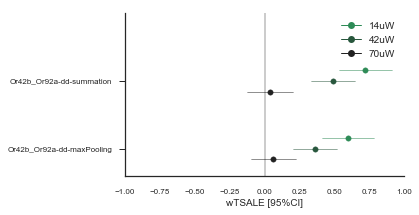

In [62]:
# f, o = WALiForest(a, column='ES', sort_by=None ,sort_by_order=list(reversed(select_ORNs)),fsize=(5,5))
## 'red','steelblue','seagreen' used for combo plots
# f, o = WALiForest(a, column='ES', sort_by=None,sort_by_order = list(reversed(['Or42b','Or92a','Or42b-Or92a'])),fsize=(5,4),c='red')
# f, o = WALiForest(a, column='ES', sort_by=None,sort_by_order = list(reversed(['Or42b_Or92a-summation','Or42b_Or92a-maxPooling'])),fsize=(5,3),c='steelblue')
f, o = WALiForest(a, column='ES', sort_by=None,sort_by_order = list(reversed(['Or42b_Or92a-dd-summation','Or42b_Or92a-dd-maxPooling'])),fsize=(5,3),c='seagreen')

In [63]:
fname = 'Or42b-Or92a_combo_air_dd'
f.savefig("C:/Users/tumkayat/Desktop/" + fname + ".pdf",dpi=1000,bbox_inches='tight')
a.to_csv("C:/Users/tumkayat/Desktop/" + fname + ".csv")

In [169]:
a

,ORNs,LightIntensity,Sex-Satiety-Air,ES,CIs,pVal,parent_n,parent_std,offspring_n,offspring_std,Tag
176,Or33b,14uW,male_fed_Air,-0.172439,"[-0.344039643912, 0.00799046476745]",0.078337,103,0.592194,52,0.483729,Or33b_14uW
177,Or33b,42uW,male_fed_Air,-0.379573,"[-0.570581794084, -0.194749948729]",0.000201,103,0.576431,52,0.494567,Or33b_42uW
178,Or33b,70uW,male_fed_Air,-0.217046,"[-0.382129231269, -0.0504989582488]",0.020096,103,0.561624,52,0.463177,Or33b_70uW
197,Or33b-Or85a,14uW,male_fed_Wind,-0.413218,"[-0.682215644243, -0.129931348295]",0.005912,104,0.675713,52,0.670278,Or33b-Or85a_14uW
198,Or33b-Or85a,42uW,male_fed_Wind,-0.056713,"[-0.298313773305, 0.199799516887]",0.660959,104,0.679414,52,0.575841,Or33b-Or85a_42uW
199,Or33b-Or85a,70uW,male_fed_Wind,-0.244037,"[-0.499759676442, 0.000318788883099]",0.060782,104,0.611336,52,0.674091,Or33b-Or85a_70uW
628,Or85a,14uW,male_fed_Air,0.159817,"[-0.0105563503843, 0.33874069801]",0.107017,104,0.605110,50,0.439136,Or85a_14uW
629,Or85a,42uW,male_fed_Air,0.118819,"[-0.0503683007366, 0.279652301527]",0.196247,104,0.552490,50,0.458702,Or85a_42uW
630,Or85a,70uW,male_fed_Air,0.074073,"[-0.0813493901225, 0.227743068733]",0.388533,104,0.519070,50,0.399021,Or85a_70uW


## Calculate the diff between observed and predicted vaues

In [171]:
a = pd.DataFrame.from_csv("C:/Users/tumkayat/Desktop/Or33b-Or47a_combo_air.csv")
combo = ['Or33b','Or47a']
intensities = ['14uW','42uW','70uW']

temp = {'ORNs':[], 'Int':[], 'summation_diff':[], 'maxpool_diff': [], 'minimization_diff': []} #,'Sum':[]}

for i in intensities:
    observed_ES = a[(a['ORNs'] == combo[0] + '-' + combo[1]) & (a['LightIntensity'] == i)]['ES'].values[0]
    summation_ES = a[(a['ORNs'] == combo[0] + '_' + combo[1] + '-summation') & (a['LightIntensity'] == i)]['ES'].values[0]
    maxpool_ES = a[(a['ORNs'] == combo[0] + '_' + combo[1] + '-maxPooling') & (a['LightIntensity'] == i)]['ES'].values[0]
    minimization_ES = a[(a['ORNs'] == combo[0] + '_' + combo[1] + '-minimization') & (a['LightIntensity'] == i)]['ES'].values[0]
    
    temp['ORNs'].append(combo[0] + '-' + combo[1])
    temp['Int'].append(i)
    temp['summation_diff'].append(abs(observed_ES - summation_ES))
    temp['maxpool_diff'].append(abs(observed_ES - maxpool_ES))
    temp['minimization_diff'].append(abs(observed_ES - minimization_ES))
#     temp['Sum'].append('NA')
    
temp['ORNs'].append('TotalDiff')
temp['Int'].append('NA')
temp['summation_diff'].append(np.sum(temp['summation_diff']))
temp['maxpool_diff'].append(np.sum(temp['maxpool_diff']))
temp['minimization_diff'].append(np.sum(temp['minimization_diff']))

combo_df = pd.DataFrame(temp)
combo_df.to_csv("C:/Users/tumkayat/Desktop/" + combo[0] + '-' + combo[1] + ".csv")

C:\Users\tumkayat\AppData\Local\Continuum\Anaconda3\envs\ipykernel_py2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [161]:
np.sum(temp['maxpool_diff'])

-0.88700481976840007

### Replicated ORN data

In [ ]:
## Select data if Sex-Satiety-Air column contains 'asghar' or '2' in it.
df_replication = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Metric']=='weighted_TSALE') & ((All_ORN_EffectSizes_df['Sex-Satiety-Air'].str.contains("-asghar"))
                            | (All_ORN_EffectSizes_df['Sex-Satiety-Air'].str.contains("2")))]
df_replication

In [ ]:
df_replication_male_fed_NoAir = df_replication[((df_replication['Sex-Satiety-Air'] == ("male_fed-asghar_NoAir"))
                            | (df_replication['Sex-Satiety-Air'] == ("male_fed2_NoAir")))]

df_replication_male_fed_Air = df_replication[((df_replication['Sex-Satiety-Air'] == ("male_fed-asghar_Air"))
                            | (df_replication['Sex-Satiety-Air'] == ("male_fed2_Air")))]

df_replication_male_starved_NoAir = df_replication[((df_replication['Sex-Satiety-Air'] == ("male_starved-asghar_NoAir"))
                            | (df_replication['Sex-Satiety-Air'] == ("male_starved2_NoAir")))]

df_replication_male_starved_Air = df_replication[((df_replication['Sex-Satiety-Air'] == ("male_starved-asghar_Air"))
                            | (df_replication['Sex-Satiety-Air'] == ("male_starved2_Air")))]

In [ ]:
## Replication female Or67d
df_replication_female = df_replication[df_replication['Sex-Satiety-Air'].str.contains('female')]

df_replication_female_fed_NoAir = df_replication_female[df_replication_female['Sex-Satiety-Air'] == ('female_fed-asghar_NoAir')]
df_replication_female_fed_Air = df_replication_female[df_replication_female['Sex-Satiety-Air'] == ('female_fed-asghar_Air')]
df_replication_female_starved_NoAir = df_replication_female[df_replication_female['Sex-Satiety-Air'] == ('female_starved-asghar_NoAir')]
df_replication_female_starved_Air = df_replication_female[df_replication_female['Sex-Satiety-Air'] == ('female_starved-asghar_Air')]

In [ ]:
## Original female Or67d
df_female_Or67d_fed_NoAir = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Metric']=='weighted_TSALE') & (All_ORN_EffectSizes_df['ORNs'] == ("Or67d"))
                            & (All_ORN_EffectSizes_df['Sex-Satiety-Air'] == ("female_fed_NoAir"))]

df_female_Or67d_fed_Air = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Metric']=='weighted_TSALE') & (All_ORN_EffectSizes_df['ORNs'] == ("Or67d"))
                            & (All_ORN_EffectSizes_df['Sex-Satiety-Air'] == ("female_fed_Air"))]

df_female_Or67d_starved_NoAir = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Metric']=='weighted_TSALE') & (All_ORN_EffectSizes_df['ORNs'] == ("Or67d"))
                            & (All_ORN_EffectSizes_df['Sex-Satiety-Air'] == ("female_starved_NoAir"))]

df_female_Or67d_starved_Air = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Metric']=='weighted_TSALE') & (All_ORN_EffectSizes_df['ORNs'] == ("Or67d"))
                            & (All_ORN_EffectSizes_df['Sex-Satiety-Air'] == ("female_starved_Air"))]

In [ ]:
len(df_replication_male_fed_NoAir) + len(df_replication_male_fed_Air) + len(df_replication_male_starved_NoAir) + len(df_replication_male_starved_Air)

In [ ]:
column = 'ES'
f, ORNorder = WALiForest(df_replication_male_starved_Air,column,sort_by=False, sort_by_order=order)
order = ORNorder
plt.title('male_starved_Air')
plt.savefig("C:/Users/tumkayat/Desktop/WALi Figures/ForestPlots/deltaPlots/ORNsReplications/" + 'male_starved_Air' + '.pdf',dpi=1000,bbox_inches='tight')                                    


### Sanity checks

In [ ]:
x = data[(data['ORNs'] == 'Or88a') & (data['LightInt'] == '70uW')]['male_fed_noair']
y = data[(data['ORNs'] == 'Or88a') & (data['LightInt'] == '70uW')]['male_fed_air']

In [ ]:
x - y

In [ ]:
data[(data['ORNs'] == 'Or88a') & (data['LightInt'] == '70uW')]['delta_male_fed_Noair_V_male_fed_air']

In [ ]:
All_ORN_EffectSizes_df

In [ ]:
y_df = All_ORN_EffectSizes_df[(All_ORN_EffectSizes_df['Metric'] == 'weighted_TSALE') & (All_ORN_EffectSizes_df['ORNs'] == 'Or42b')
                      & (All_ORN_EffectSizes_df['Sex-Satiety-Air'] == 'male_fed_Air')
                      
                      ]

In [ ]:
from scipy.interpolate import interp1d

In [ ]:
x = [14,42,70]
y = y_df['ES'].values

In [ ]:
f = interp1d(x, y)

In [ ]:
xnew = np.linspace(14, 70, num=100, endpoint=True)

In [ ]:
plt.plot(x, y, 'o', xnew, f(xnew), '-')
plt.legend(['data', 'linear'], loc='best')
plt.ylim(ymin=0)
plt.xlabel('Light Intensity (uW/mm2)')
plt.ylabel('weighted_TSALE')
sns.set(style="ticks")
sns.despine(trim=False)

In [ ]:
f(xnew)

In [ ]:
t = pd.read_pickle('K:/ACC/Tayfuntumkaya/DATA/CompleteWALiSARORNData_Analyzed/Gr63a/weighted_TSALE/weighted_TSALE_values.pkl')

In [ ]:
t['Sex-Satiety-Wind'] = t['Sex'] + '-' + t['Satiety'] +'-' +  t['Wind status']

In [ ]:
k = t[(t['Sex-Satiety-Wind'] == 'male-fed-Air') & (t['Genotype'] == 'w1118-UAS-CsChrimson') & (t['Light Intensity(uW/mm2)'] == '14uW')]['weighted_TSALE_P10']
l = t[(t['Sex-Satiety-Wind'] == 'male-fed-Air') & (t['Genotype'] == 'w1118-Gr63a-Gal4') & (t['Light Intensity(uW/mm2)'] == '14uW')]['weighted_TSALE_P10']


In [ ]:
a = t['Genotype'].unique()

In [ ]:
for i in range(len(a)):
    if (('w1118' in a[i]) or ('W1118' in a[i])) and ('UAS' in a[i]):
        responder_ctrl =  a[i]
        
    if (('w1118' in a[i]) or ('W1118' in a[i])) and (('Gal4' in a[i]) or ('gal4' in a[i])) :
        driver_ctrl =  a[i]

In [ ]:
driver_ctrl

In [ ]:
dabest.bootstrap_tools.bootstrap(k.dropna().values)


In [ ]:
t

### Analyses of the control groups

In [2]:
def GetGenotypeMeans(temp, rootDirectory):

    ornList = os.listdir(rootDirectory)
    bar = progressbar.ProgressBar()

    for i in bar(range(len(ornList))):
        ## read the data in a df
        ORN = ornList[i]
        
        print '%s is in progress...' %(ORN)
        
        rootDir = os.path.join(rootDirectory,ORN)
        df = pd.read_pickle(rootDir + '/weighted_TSALE_values.pkl')

        ## combined these variables so can choose groups of data
        df['Sex-Satiety-Wind-Intensity'] = df['Sex'] + '-' + df['Satiety'] + '-' + df['Wind status'] + '-' + df['Light Intensity(uW/mm2)']

        ## detect responder and driver control genetoypes
        genotypes = df['Genotype'].unique()
        for i in range(len(genotypes)):
            if (('w1118' in genotypes[i]) or ('W1118' in genotypes[i])) and ('UAS' in genotypes[i]):
                responder_ctrl =  genotypes[i]

            elif (('w1118' in genotypes[i]) or ('W1118' in genotypes[i])) and (('Gal4' in genotypes[i]) or ('gal4' in genotypes[i])):
                driver_ctrl =  genotypes[i]

            elif (('UAS' in genotypes[i]) or ('uas' in genotypes[i])) and (('Gal4' in genotypes[i]) or ('gal4' in genotypes[i])):
                experiment = genotypes[i]

        conditions = df['Sex-Satiety-Wind-Intensity'].unique()

        if len(conditions) == 12:

            for c in conditions:
                responder_ctrl_values_P10 = df[(df['Sex-Satiety-Wind-Intensity'] == c) & (df['Genotype'] == responder_ctrl)]['weighted_TSALE_P10']
                responder_ctrl_values_P01 = df[(df['Sex-Satiety-Wind-Intensity'] == c) & (df['Genotype'] == responder_ctrl)]['weighted_TSALE_P01']

                driver_ctrl_values_P10 = df[(df['Sex-Satiety-Wind-Intensity'] == c) & (df['Genotype'] == driver_ctrl)]['weighted_TSALE_P10']
                driver_ctrl_values_P01 = df[(df['Sex-Satiety-Wind-Intensity'] == c) & (df['Genotype'] == driver_ctrl)]['weighted_TSALE_P01']

                exp_values_P10 = df[(df['Sex-Satiety-Wind-Intensity'] == c) & (df['Genotype'] == experiment)]['weighted_TSALE_P10']
                exp_values_P01 = df[(df['Sex-Satiety-Wind-Intensity'] == c) & (df['Genotype'] == experiment)]['weighted_TSALE_P01']
                try:
                    ResponderCtrl_means_P01 = dabest.bootstrap_tools.bootstrap(responder_ctrl_values_P01.dropna().values).summary
                    temp['weighted-TSALE'].append(ResponderCtrl_means_P01)
                    temp['Status'].append('Responder')
                    temp['Epoch'].append('P01')
                    temp['Sex-Satiety-Wind-Intensity'].append(c)
                    temp['Genotypes'].append(responder_ctrl)
                    temp['ORN'].append(ORN)
                    
                    ResponderCtrl_means_P10 = dabest.bootstrap_tools.bootstrap(responder_ctrl_values_P10.dropna().values).summary
                    temp['weighted-TSALE'].append(ResponderCtrl_means_P10)
                    temp['Status'].append('Responder')
                    temp['Epoch'].append('P10')
                    temp['Sex-Satiety-Wind-Intensity'].append(c)
                    temp['Genotypes'].append(responder_ctrl)
                    temp['ORN'].append(ORN)
                except:
                    temp['weighted-TSALE'].append(np.nan)
                    temp['Status'].append('Responder')
                    temp['Epoch'].append('P01')
                    temp['Sex-Satiety-Wind-Intensity'].append(c)
                    temp['Genotypes'].append(responder_ctrl)
                    temp['ORN'].append(ORN)

                    temp['weighted-TSALE'].append(np.nan)
                    temp['Status'].append('Responder')
                    temp['Epoch'].append('P10')
                    temp['Sex-Satiety-Wind-Intensity'].append(c)
                    temp['Genotypes'].append(responder_ctrl)
                    temp['ORN'].append(ORN)

                try:   
                    DriverCtrl_means_P01 = dabest.bootstrap_tools.bootstrap(driver_ctrl_values_P01.dropna().values).summary
                    temp['weighted-TSALE'].append(DriverCtrl_means_P01)
                    temp['Status'].append('Driver')
                    temp['Epoch'].append('P01')
                    temp['Sex-Satiety-Wind-Intensity'].append(c)
                    temp['Genotypes'].append(driver_ctrl)
                    temp['ORN'].append(ORN)

                    DriverCtrl_means_P10 = dabest.bootstrap_tools.bootstrap(driver_ctrl_values_P10.dropna().values).summary
                    temp['weighted-TSALE'].append(DriverCtrl_means_P10)
                    temp['Status'].append('Driver')
                    temp['Epoch'].append('P10')
                    temp['Sex-Satiety-Wind-Intensity'].append(c)
                    temp['Genotypes'].append(driver_ctrl)
                    temp['ORN'].append(ORN)

                except: 
                    temp['weighted-TSALE'].append(np.nan)
                    temp['Status'].append('Driver')
                    temp['Epoch'].append('P01')
                    temp['Sex-Satiety-Wind-Intensity'].append(c)
                    temp['Genotypes'].append(driver_ctrl)
                    temp['ORN'].append(ORN)

                    temp['weighted-TSALE'].append(np.nan)
                    temp['Status'].append('Driver')
                    temp['Epoch'].append('P10')
                    temp['Sex-Satiety-Wind-Intensity'].append(c)
                    temp['Genotypes'].append(driver_ctrl)
                    temp['ORN'].append(ORN)

                try:   
                    exp_means_P01 = dabest.bootstrap_tools.bootstrap(exp_values_P01.dropna().values).summary
                    temp['weighted-TSALE'].append(exp_means_P01)
                    temp['Status'].append('Experiment')
                    temp['Epoch'].append('P01')
                    temp['Sex-Satiety-Wind-Intensity'].append(c)
                    temp['Genotypes'].append(experiment)
                    temp['ORN'].append(ORN)

                    exp_means_P10 = dabest.bootstrap_tools.bootstrap(exp_values_P10.dropna().values).summary
                    temp['weighted-TSALE'].append(exp_means_P10)
                    temp['Status'].append('Experiment')
                    temp['Epoch'].append('P10')
                    temp['Sex-Satiety-Wind-Intensity'].append(c)
                    temp['Genotypes'].append(experiment)
                    temp['ORN'].append(ORN)

                except: 
                    temp['weighted-TSALE'].append(np.nan)
                    temp['Status'].append('Experiment')
                    temp['Epoch'].append('P01')
                    temp['Sex-Satiety-Wind-Intensity'].append(c)
                    temp['Genotypes'].append(experiment)
                    temp['ORN'].append(ORN)

                    temp['weighted-TSALE'].append(np.nan)
                    temp['Status'].append('Experiment')
                    temp['Epoch'].append('P10')
                    temp['Sex-Satiety-Wind-Intensity'].append(c)
                    temp['Genotypes'].append(experiment)
                    temp['ORN'].append(ORN)

        elif len(conditions) > 12:
            shortened_conditions = []

            for item in conditions:
                if (not 'asghar' in item) & (not 'safwan' in item) & (not 'fed2' in item) & (not 'starved2' in item) \
                   & (not '28uW' in item) & (not '56uW' in item) & (not 'female' in item):
                    shortened_conditions.append(item)

            if len(shortened_conditions) == 12:
                print '%s shortened conditions...' %(ORN)
                for c in shortened_conditions:
                    responder_ctrl_values_P10 = df[(df['Sex-Satiety-Wind-Intensity'] == c) & (df['Genotype'] == responder_ctrl)]['weighted_TSALE_P10']
                    responder_ctrl_values_P01 = df[(df['Sex-Satiety-Wind-Intensity'] == c) & (df['Genotype'] == responder_ctrl)]['weighted_TSALE_P01']

                    driver_ctrl_values_P10 = df[(df['Sex-Satiety-Wind-Intensity'] == c) & (df['Genotype'] == driver_ctrl)]['weighted_TSALE_P10']
                    driver_ctrl_values_P01 = df[(df['Sex-Satiety-Wind-Intensity'] == c) & (df['Genotype'] == driver_ctrl)]['weighted_TSALE_P01']

                    exp_values_P10 = df[(df['Sex-Satiety-Wind-Intensity'] == c) & (df['Genotype'] == experiment)]['weighted_TSALE_P10']
                    exp_values_P01 = df[(df['Sex-Satiety-Wind-Intensity'] == c) & (df['Genotype'] == experiment)]['weighted_TSALE_P01']
                    try:
                        ResponderCtrl_means_P01 = dabest.bootstrap_tools.bootstrap(responder_ctrl_values_P01.dropna().values).summary
                        temp['weighted-TSALE'].append(ResponderCtrl_means_P01)
                        temp['Status'].append('Responder')
                        temp['Epoch'].append('P01')
                        temp['Sex-Satiety-Wind-Intensity'].append(c)
                        temp['Genotypes'].append(responder_ctrl)
                        temp['ORN'].append(ORN)

                        ResponderCtrl_means_P10 = dabest.bootstrap_tools.bootstrap(responder_ctrl_values_P10.dropna().values).summary
                        temp['weighted-TSALE'].append(ResponderCtrl_means_P10)
                        temp['Status'].append('Responder')
                        temp['Epoch'].append('P10')
                        temp['Sex-Satiety-Wind-Intensity'].append(c)
                        temp['Genotypes'].append(responder_ctrl)
                        temp['ORN'].append(ORN)
                    except:
                        temp['weighted-TSALE'].append(np.nan)
                        temp['Status'].append('Responder')
                        temp['Epoch'].append('P01')
                        temp['Sex-Satiety-Wind-Intensity'].append(c)
                        temp['Genotypes'].append(responder_ctrl)
                        temp['ORN'].append(ORN)

                        temp['weighted-TSALE'].append(np.nan)
                        temp['Status'].append('Responder')
                        temp['Epoch'].append('P10')
                        temp['Sex-Satiety-Wind-Intensity'].append(c)
                        temp['Genotypes'].append(responder_ctrl)
                        temp['ORN'].append(ORN)

                    try:   
                        DriverCtrl_means_P01 = dabest.bootstrap_tools.bootstrap(driver_ctrl_values_P01.dropna().values).summary
                        temp['weighted-TSALE'].append(DriverCtrl_means_P01)
                        temp['Status'].append('Driver')
                        temp['Epoch'].append('P01')
                        temp['Sex-Satiety-Wind-Intensity'].append(c)
                        temp['Genotypes'].append(driver_ctrl)
                        temp['ORN'].append(ORN)

                        DriverCtrl_means_P10 = dabest.bootstrap_tools.bootstrap(driver_ctrl_values_P10.dropna().values).summary
                        temp['weighted-TSALE'].append(DriverCtrl_means_P10)
                        temp['Status'].append('Driver')
                        temp['Epoch'].append('P10')
                        temp['Sex-Satiety-Wind-Intensity'].append(c)
                        temp['Genotypes'].append(driver_ctrl)
                        temp['ORN'].append(ORN)

                    except: 
                        temp['weighted-TSALE'].append(np.nan)
                        temp['Status'].append('Driver')
                        temp['Epoch'].append('P01')
                        temp['Sex-Satiety-Wind-Intensity'].append(c)
                        temp['Genotypes'].append(driver_ctrl)
                        temp['ORN'].append(ORN)

                        temp['weighted-TSALE'].append(np.nan)
                        temp['Status'].append('Driver')
                        temp['Epoch'].append('P10')
                        temp['Sex-Satiety-Wind-Intensity'].append(c)
                        temp['Genotypes'].append(driver_ctrl)
                        temp['ORN'].append(ORN)

                    try:   
                        exp_means_P01 = dabest.bootstrap_tools.bootstrap(exp_values_P01.dropna().values).summary
                        temp['weighted-TSALE'].append(exp_means_P01)
                        temp['Status'].append('Experiment')
                        temp['Epoch'].append('P01')
                        temp['Sex-Satiety-Wind-Intensity'].append(c)
                        temp['Genotypes'].append(experiment)
                        temp['ORN'].append(ORN)

                        exp_means_P10 = dabest.bootstrap_tools.bootstrap(exp_values_P10.dropna().values).summary
                        temp['weighted-TSALE'].append(exp_means_P10)
                        temp['Status'].append('Experiment')
                        temp['Epoch'].append('P10')
                        temp['Sex-Satiety-Wind-Intensity'].append(c)
                        temp['Genotypes'].append(experiment)
                        temp['ORN'].append(ORN)

                    except: 
                        temp['weighted-TSALE'].append(np.nan)
                        temp['Status'].append('Experiment')
                        temp['Epoch'].append('P01')
                        temp['Sex-Satiety-Wind-Intensity'].append(c)
                        temp['Genotypes'].append(experiment)
                        temp['ORN'].append(ORN)

                        temp['weighted-TSALE'].append(np.nan)
                        temp['Status'].append('Experiment')
                        temp['Epoch'].append('P10')
                        temp['Sex-Satiety-Wind-Intensity'].append(c)
                        temp['Genotypes'].append(experiment)
                        temp['ORN'].append(ORN)
            else:
                print '%s could not shorten conditions...' %(ORN)
                pass

        elif len(conditions) < 12:
            print '%s conditions too short' %(ORN) 
            pass
                
    return temp

In [3]:
temp = {'ORN':[],'Genotypes':[], 'Status':[], 'Sex-Satiety-Wind-Intensity':[], 'Epoch':[], 'weighted-TSALE':[]} 

t = GetGenotypeMeans(temp, 'C:/Users/tumkayat/Desktop/ORScreening/WALiSAR_all_ORNs/Pickles/')

N/A% (0 of 57) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Gr21a is in progress...


  1% (1 of 57) |                          | Elapsed Time: 0:00:21 ETA:      N/A

Gr63a is in progress...
Gr63a shortened conditions...


  3% (2 of 57) |                          | Elapsed Time: 0:00:44 ETA:      N/A

Gr66a is in progress...


  5% (3 of 57) |#                         | Elapsed Time: 0:01:05 ETA:      N/A

Or10a is in progress...


  7% (4 of 57) |#                         | Elapsed Time: 0:01:26 ETA:      N/A

Or13a is in progress...


  8% (5 of 57) |##                        | Elapsed Time: 0:01:46 ETA:      N/A

Or19a is in progress...


 10% (6 of 57) |##                        | Elapsed Time: 0:02:07 ETA:      N/A

Or19b is in progress...
Or19b shortened conditions...


 12% (7 of 57) |###                       | Elapsed Time: 0:02:31 ETA:      N/A

Or1a is in progress...
Or1a shortened conditions...


 14% (8 of 57) |###                       | Elapsed Time: 0:02:56 ETA:      N/A

Or22a is in progress...


 15% (9 of 57) |####                      | Elapsed Time: 0:03:27 ETA:      N/A

Or22b is in progress...
Or22b shortened conditions...


 17% (10 of 57) |####                     | Elapsed Time: 0:03:46 ETA:      N/A

Or22c is in progress...


 19% (11 of 57) |####                     | Elapsed Time: 0:04:09 ETA:      N/A

Or23a is in progress...


 21% (12 of 57) |#####                    | Elapsed Time: 0:04:30 ETA:      N/A

Or30a is in progress...


 22% (13 of 57) |#####                    | Elapsed Time: 0:04:52 ETA:      N/A

Or33a is in progress...


 24% (14 of 57) |######                   | Elapsed Time: 0:05:19 ETA:      N/A

Or33b is in progress...


 26% (15 of 57) |######                   | Elapsed Time: 0:05:38 ETA:      N/A

Or33c is in progress...


 28% (16 of 57) |#######                  | Elapsed Time: 0:05:59 ETA:      N/A

Or35a is in progress...


 29% (17 of 57) |#######                  | Elapsed Time: 0:06:23 ETA:      N/A

Or42b is in progress...
Or42b shortened conditions...


 31% (18 of 57) |#######                  | Elapsed Time: 0:06:42 ETA:      N/A

Or43a is in progress...
Or43a shortened conditions...


 33% (19 of 57) |########                 | Elapsed Time: 0:07:02 ETA:      N/A

Or43b is in progress...


 35% (20 of 57) |########                 | Elapsed Time: 0:07:32 ETA:      N/A

Or45a is in progress...


 36% (21 of 57) |#########                | Elapsed Time: 0:07:53 ETA:      N/A

Or45b is in progress...


 38% (22 of 57) |#########                | Elapsed Time: 0:08:14 ETA:      N/A

Or46a is in progress...


 40% (23 of 57) |##########               | Elapsed Time: 0:08:39 ETA:      N/A

Or47a is in progress...
Or47a shortened conditions...


 42% (24 of 57) |##########               | Elapsed Time: 0:08:59 ETA:      N/A

Or47b is in progress...
Or47b shortened conditions...


 43% (25 of 57) |##########               | Elapsed Time: 0:09:20 ETA:      N/A

Or49b is in progress...


 45% (26 of 57) |###########              | Elapsed Time: 0:09:44 ETA:      N/A

Or56a is in progress...


 47% (27 of 57) |###########              | Elapsed Time: 0:10:04 ETA:      N/A

Or59a is in progress...


 49% (28 of 57) |############             | Elapsed Time: 0:10:25 ETA:      N/A

Or59b is in progress...


 50% (29 of 57) |############             | Elapsed Time: 0:10:47 ETA:      N/A

Or59c is in progress...
Or59c shortened conditions...


 52% (30 of 57) |#############            | Elapsed Time: 0:11:06 ETA:      N/A

Or63a is in progress...


 54% (31 of 57) |#############            | Elapsed Time: 0:11:29 ETA:      N/A

Or65a is in progress...
Or65a shortened conditions...


 56% (32 of 57) |##############           | Elapsed Time: 0:11:50 ETA:      N/A

Or65b is in progress...


 57% (33 of 57) |##############           | Elapsed Time: 0:12:11 ETA:      N/A

Or65c is in progress...
Or65c shortened conditions...


 59% (34 of 57) |##############           | Elapsed Time: 0:12:30 ETA:      N/A

Or67a is in progress...


 61% (35 of 57) |###############          | Elapsed Time: 0:12:51 ETA:      N/A

Or67b is in progress...


 63% (36 of 57) |###############          | Elapsed Time: 0:13:11 ETA:      N/A

Or67c is in progress...
Or67c shortened conditions...


 64% (37 of 57) |################         | Elapsed Time: 0:13:33 ETA:      N/A

Or67d is in progress...
Or67d shortened conditions...


 66% (38 of 57) |################         | Elapsed Time: 0:14:10 ETA:      N/A

Or69a is in progress...


 68% (39 of 57) |#################        | Elapsed Time: 0:14:31 ETA:      N/A

Or71a is in progress...


 70% (40 of 57) |#################        | Elapsed Time: 0:14:51 ETA:      N/A

Or74a is in progress...


 71% (41 of 57) |#################        | Elapsed Time: 0:15:15 ETA:      N/A

Or7a is in progress...


 73% (42 of 57) |##################       | Elapsed Time: 0:15:36 ETA:      N/A

Or82a is in progress...
Or82a shortened conditions...


 75% (43 of 57) |##################       | Elapsed Time: 0:15:59 ETA:      N/A

Or83a is in progress...


 77% (44 of 57) |###################      | Elapsed Time: 0:16:23 ETA:      N/A

Or83c is in progress...


 78% (45 of 57) |###################      | Elapsed Time: 0:16:44 ETA:      N/A

Or85a is in progress...


 80% (46 of 57) |####################     | Elapsed Time: 0:17:04 ETA:      N/A

Or85b is in progress...


 82% (47 of 57) |####################     | Elapsed Time: 0:17:25 ETA:      N/A

Or85c is in progress...
Or85c shortened conditions...


 84% (48 of 57) |#####################    | Elapsed Time: 0:17:47 ETA:      N/A

Or85d is in progress...
Or85d shortened conditions...


 85% (49 of 57) |#####################    | Elapsed Time: 0:18:09 ETA:      N/A

Or85e is in progress...


 87% (50 of 57) |#####################    | Elapsed Time: 0:18:29 ETA:      N/A

Or85f is in progress...


 89% (51 of 57) |######################   | Elapsed Time: 0:18:51 ETA:      N/A

Or88a is in progress...
Or88a shortened conditions...


 91% (52 of 57) |######################   | Elapsed Time: 0:19:15 ETA:      N/A

Or92a is in progress...


 92% (53 of 57) |#######################  | Elapsed Time: 0:19:36 ETA:      N/A

Or94b is in progress...


 94% (54 of 57) |#######################  | Elapsed Time: 0:19:56 ETA:      N/A

Or98a is in progress...


 96% (55 of 57) |######################## | Elapsed Time: 0:20:17 ETA:      N/A

Or9a is in progress...


 98% (56 of 57) |######################## | Elapsed Time: 0:20:37 ETA:      N/A

Orco is in progress...
Orco shortened conditions...


100% (57 of 57) |#########################| Elapsed Time: 0:21:07 Time: 0:21:07


In [ ]:
ch = pd.read_pickle('C:/Users/tumkayat/Desktop/ORScreening/WALiSAR_all_ORNs/Pickles/Or42a/weighted_TSALE_values.pkl')


In [ ]:
ch.columns

In [ ]:
ch[(ch['Sex-Satiety-Wind-Intensity'] == 'male-starved-Air-14uW') & (ch['Genotype'] == 'w1118-UAS-CsChrimson')]

In [ ]:
ch['Sex-Satiety-Wind-Intensity'] = ch['Sex'] + '-' + ch['Satiety'] + '-' + ch['Wind status'] + '-' + ch['Light Intensity(uW/mm2)']
len(ch['Sex-Satiety-Wind-Intensity'].unique())

In [ ]:
tt = ch['Sex-Satiety-Wind-Intensity'].unique()
tt

In [ ]:
## Remove "Asghar" from the orco data, since I dont want to drop it.
new_condition_col = []
for i in range(len(ch)):
    if 'asghar' in ch['Sex'][i]:
        new = ch['Sex'][i].replace('-asghar','')
        new_condition_col.append(new)
    else:
        new_condition_col.append(ch['Sex'][i])
ch['Sex'] = new_condition_col

In [ ]:
## Save the Orco pkl file as it is
ch.to_pickle('C:/Users/tumkayat/Desktop/ORScreening/WALiSAR_all_ORNs/Pickles/Orco/weighted_TSALE_values.pkl')

In [ ]:
shortened_conditions = []
            
for item in shortened_conditions:
    if (not 'asghar' in item) & (not 'safwan' in item) & (not 'fed2' in item) & (not 'starved2' in item) \
       & (not '28uW' in item) & (not '56uW' in item) & (not 'female' in item):
        shortened_conditions.append(item)
shortened_conditions

In [ ]:
t.keys()

In [5]:
# dd = pd.DataFrame.from_dict(temp,orient='index').transpose()
dd = pd.DataFrame(t,columns=['ORN','Genotypes','Status','Epoch', 'Sex-Satiety-Wind-Intensity', 'weighted-TSALE'])

In [ ]:
dd

In [6]:
int_col = []
int_col_wind = []

for i in range(len(dd)):
    int_col.append(dd['Sex-Satiety-Wind-Intensity'].iloc[i].split('-')[-1])
    int_col_wind.append(dd['Sex-Satiety-Wind-Intensity'].iloc[i].split('-')[-2])
    
dd['Intensity'] = int_col

dd['Wind'] = int_col_wind


In [7]:
dd['Status-Epoch'] = dd['Status'] + dd['Epoch']
dd['Status-Epoch-Int'] = dd['Status'] + '_' + dd['Epoch'] +'_' + dd['Intensity']

In [ ]:
# dd[dd['Sex-Satiety-Wind-Intensity'].str.contains('asghar')]['Genotypes'].unique()

In [ ]:
## Only some extra Or67d, remove Safwan
# dd = dd[~dd['Sex-Satiety-Wind-Intensity'].str.contains('safwan')]

In [ ]:
# dd['weighted-TSALE'] = dd['Means']

In [ ]:
dd.shape

In [8]:
dd['Abs_weighted-TSALE'] = abs(dd['weighted-TSALE'])

In [ ]:
dd[dd['Sex-Satiety-Wind-Intensity'].str.contains('male') & dd['Sex-Satiety-Wind-Intensity'].str.contains('fed')&
   dd['Sex-Satiety-Wind-Intensity'].str.contains('14uW') & dd['Sex-Satiety-Wind-Intensity'].str.contains('NoAir')]

## Plot overall Means

In [ ]:
fig,b = bs.contrastplot(dd, x = 'Status-Epoch', y = 'Abs_weighted-TSALE',
                                color_col= 'Epoch',
                         paired = False, fig_size=(12,12), 
                        float_contrast = False,
                              idx = (('ResponderP01','ResponderP10'),
                                     ('DriverP01','DriverP10'),
                                    ('ExperimentP01','ExperimentP10')
                                    ),
                       )
b

In [ ]:
fig.savefig("C:/Users/tumkayat/Desktop/WALi Figures/AnalysesofTheControl/ComparingEpochs_abs.pdf",dpi=1000,bbox_inches='tight')
b.to_csv("C:/Users/tumkayat/Desktop/WALi Figures/AnalysesofTheControl/ComparingEpochs_abs.csv")

## Break down the data set into conditions

In [9]:
male_fed_noAir = dd[dd['Sex-Satiety-Wind-Intensity'].str.contains('male') & dd['Sex-Satiety-Wind-Intensity'].str.contains('fed')&
   dd['Sex-Satiety-Wind-Intensity'].str.contains('NoAir')]

male_fed_Air = dd[dd['Sex-Satiety-Wind-Intensity'].str.contains('male') & dd['Sex-Satiety-Wind-Intensity'].str.contains('fed')&
   dd['Sex-Satiety-Wind-Intensity'].str.contains('-Air')]

male_starved_noAir = dd[dd['Sex-Satiety-Wind-Intensity'].str.contains('male') & dd['Sex-Satiety-Wind-Intensity'].str.contains('starved')&
   dd['Sex-Satiety-Wind-Intensity'].str.contains('NoAir')]

male_starved_Air = dd[dd['Sex-Satiety-Wind-Intensity'].str.contains('male') & dd['Sex-Satiety-Wind-Intensity'].str.contains('starved')&
   dd['Sex-Satiety-Wind-Intensity'].str.contains('-Air')]

In [ ]:
# int_col = []
# for i in range(len(male_starved_noAir)):
#     int_col.append(male_starved_noAir['Sex-Satiety-Wind-Intensity'].iloc[i].split('-')[-2])
# male_starved_noAir['Wind'] = int_col

In [ ]:
male_starved_Air.shape

In [10]:
male_fed_noAir['Wind-Int-Status-Epoch'] = male_fed_noAir['Wind'] + '_' + male_fed_noAir['Intensity'] + '_' + male_fed_noAir['Status-Epoch']
male_fed_Air['Wind-Int-Status-Epoch'] = male_fed_Air['Wind'] + '_' + male_fed_Air['Intensity'] + '_' + male_fed_Air['Status-Epoch']
male_starved_noAir['Wind-Int-Status-Epoch'] = male_starved_noAir['Wind'] + '_' + male_starved_noAir['Intensity'] + '_' + male_starved_noAir['Status-Epoch']
male_starved_Air['Wind-Int-Status-Epoch'] = male_starved_Air['Wind'] + '_' + male_starved_Air['Intensity'] + '_' + male_starved_Air['Status-Epoch']


C:\Users\tumkayat\AppData\Local\Continuum\Anaconda3\envs\ipykernel_py2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\tumkayat\AppData\Local\Continuum\Anaconda3\envs\ipykernel_py2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\tumkayat\AppData\Local\Continuum\Anaconda3\envs\ipykernel_py2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [11]:
male_fed_total = pd.concat([male_fed_noAir,male_fed_Air])
male_starved_total = pd.concat([male_starved_noAir,male_starved_Air])

In [ ]:
male_fed_total

In [ ]:
dd['abs_weighted-TSALE'] = abs(dd['weighted-TSALE'])

In [ ]:
male_starved_total['Wind-Int-Status-Epoch'].unique()

### Plot Responders in All conditions

In [ ]:
fig,b = bs.contrastplot(male_fed_total, x = 'Wind-Int-Status-Epoch', y = 'Abs_weighted-TSALE',
                                color_col= 'Epoch',
                         paired = False, fig_size=(24,12), 
                        float_contrast = False,
                              idx = (('NoAir_14uW_ResponderP01','NoAir_14uW_DriverP10'),
                                     ('Air_14uW_ResponderP01','Air_14uW_DriverP10'),
                                     ('NoAir_42uW_ResponderP01','NoAir_42uW_DriverP10'),
                                     ('Air_42uW_ResponderP01','Air_42uW_DriverP10'),
                                     ('NoAir_70uW_ResponderP01','NoAir_70uW_DriverP10'),
                                     ('Air_70uW_ResponderP01','Air_70uW_DriverP10'),
                                     
                                    ),
                       )
b

In [ ]:
fname =  "male_starved" + '_' + 'Responder_Entire_Exp_abs'
fig.savefig("C:/Users/tumkayat/Desktop/WALi Figures/AnalysesofTheControl/BreakDowns/" + fname + ".pdf",dpi=1000,bbox_inches='tight')
b.to_csv("C:/Users/tumkayat/Desktop/WALi Figures/AnalysesofTheControl/BreakDowns/" + fname + ".csv")

### Plot Drivers across conditions

In [ ]:
fig,b = bs.contrastplot(male_fed_total, x = 'Wind-Int-Status-Epoch', y = 'abs_weighted-TSALE',
                                color_col= 'Epoch',
                         paired = False, fig_size=(16,12), 
                        float_contrast = False,
                              idx = (('NoAir_14uW_DriverP01','NoAir_14uW_DriverP10'),
                                     ('Air_14uW_DriverP01','Air_14uW_DriverP10'),
                                     ('NoAir_42uW_DriverP01','NoAir_42uW_DriverP10'),
                                     ('Air_42uW_DriverP01','Air_42uW_DriverP10'),
                                     ('NoAir_70uW_DriverP01','NoAir_70uW_DriverP10'),
                                     ('Air_70uW_DriverP01','Air_70uW_DriverP10')
                                    ),
                       )
b

In [ ]:
fname =  "male_fed" + '_' + 'Driver_Entire_Exp_abs'
fig.savefig("C:/Users/tumkayat/Desktop/WALi Figures/AnalysesofTheControl/BreakDowns/" + fname + ".pdf",dpi=1000,bbox_inches='tight')
b.to_csv("C:/Users/tumkayat/Desktop/WALi Figures/AnalysesofTheControl/BreakDowns/" + fname + ".csv")

### Experiments across conditions

In [ ]:
fig,b = bs.contrastplot(male_fed_total, x = 'Wind-Int-Status-Epoch', y = 'abs_weighted-TSALE',
                                color_col= 'Epoch',
                         paired = False, fig_size=(16,12), 
                        float_contrast = False,
                              idx = (('NoAir_14uW_ExperimentP01','NoAir_14uW_ExperimentP10'),
                                     ('Air_14uW_ExperimentP01','Air_14uW_ExperimentP10'),
                                     ('NoAir_42uW_ExperimentP01','NoAir_42uW_ExperimentP10'),
                                     ('Air_42uW_ExperimentP01','Air_42uW_ExperimentP10'),
                                     ('NoAir_70uW_ExperimentP01','NoAir_70uW_ExperimentP10'),
                                     ('Air_70uW_ExperimentP01','Air_70uW_ExperimentP10')
                                    ),
                       )
b

In [ ]:
fname =  "male_fed" + '_' + 'Experiment_Entire_Exp_abs'
fig.savefig("C:/Users/tumkayat/Desktop/WALi Figures/AnalysesofTheControl/BreakDowns/" + fname + ".pdf",dpi=1000,bbox_inches='tight')
b.to_csv("C:/Users/tumkayat/Desktop/WALi Figures/AnalysesofTheControl/BreakDowns/" + fname + ".csv")

## Paired Plots

In [ ]:
male_starved_total[male_starved_total['Wind-Int-Status-Epoch'] == 'Air_14uW_ResponderP01']['Abs_weighted-TSALE'].isnull().sum()

In [ ]:
male_starved_total[male_starved_total['Abs_weighted-TSALE'].isnull()]

In [ ]:
## Drop the NAN weighted-TSALE to pair up
male_fed_total_dropnan = male_fed_total[~male_fed_total['Abs_weighted-TSALE'].isnull()]
male_starved_total_dropnan = male_starved_total[~male_starved_total['Abs_weighted-TSALE'].isnull()]

In [ ]:
## Drop Or49a and  Or24a
## Detect the indices, because responder controls belong to these groups do not contain
## Or24a in the genotype names 
male_fed_total_dropnan[male_fed_total_dropnan['Genotypes'].str.contains('Or24a')]
male_fed_total_dropnan.loc[899]

In [ ]:
R = male_fed_total_dropnan[male_fed_total_dropnan['Wind-Int-Status-Epoch'] == 'NoAir_14uW_ResponderP01']
D = male_fed_total_dropnan[male_fed_total_dropnan['Wind-Int-Status-Epoch'] == 'NoAir_14uW_DriverP01']

In [ ]:
male_fed_total_dropnan.loc[3360:3364]

In [ ]:
D.loc[3362]

In [ ]:
R.index[44]

In [ ]:
for i in range(len(R.index)):
    check = D.index[i] - R.index[i]
    if check != 2:
        print i
    

### Responder vs Driver

C:\Users\tumkayat\AppData\Local\Continuum\Anaconda3\envs\ipykernel_py2\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


,reference_group,experimental_group,stat_summary,bca_ci_low,bca_ci_high,ci,is_difference,is_paired,pvalue_2samp_paired_ttest,pvalue_wilcoxon
0,NoAir_14uW_ResponderP01,NoAir_14uW_DriverP01,0.104395,0.069143,0.138678,95.0,True,True,2.994075e-07,0.000003
1,NoAir_14uW_ResponderP10,NoAir_14uW_DriverP10,0.028218,0.010524,0.047230,95.0,True,True,4.433003e-03,0.006349
2,Air_14uW_ResponderP01,Air_14uW_DriverP01,0.066009,0.033457,0.099504,95.0,True,True,2.488828e-04,0.000909
3,Air_14uW_ResponderP10,Air_14uW_DriverP10,0.094671,0.054052,0.136333,95.0,True,True,4.311531e-05,0.000052
4,NoAir_42uW_ResponderP01,NoAir_42uW_DriverP01,0.021897,0.004363,0.039677,95.0,True,True,2.046792e-02,0.036299
5,NoAir_42uW_ResponderP10,NoAir_42uW_DriverP10,0.042454,0.019029,0.067201,95.0,True,True,1.341680e-03,0.002850
6,Air_42uW_ResponderP01,Air_42uW_DriverP01,0.003989,-0.023164,0.035118,95.0,True,True,7.936122e-01,0.845661
7,Air_42uW_ResponderP10,Air_42uW_DriverP10,0.038001,0.005416,0.075864,95.0,True,True,4.186493e-02,0.064709
8,NoAir_70uW_ResponderP01,NoAir_70uW_DriverP01,0.023910,0.006436,0.042468,95.0,True,True,1.373220e-02,0.018884
9,NoAir_70uW_ResponderP10,NoAir_70uW_DriverP10,0.043991,0.022039,0.065937,95.0,True,True,2.814708e-04,0.000682


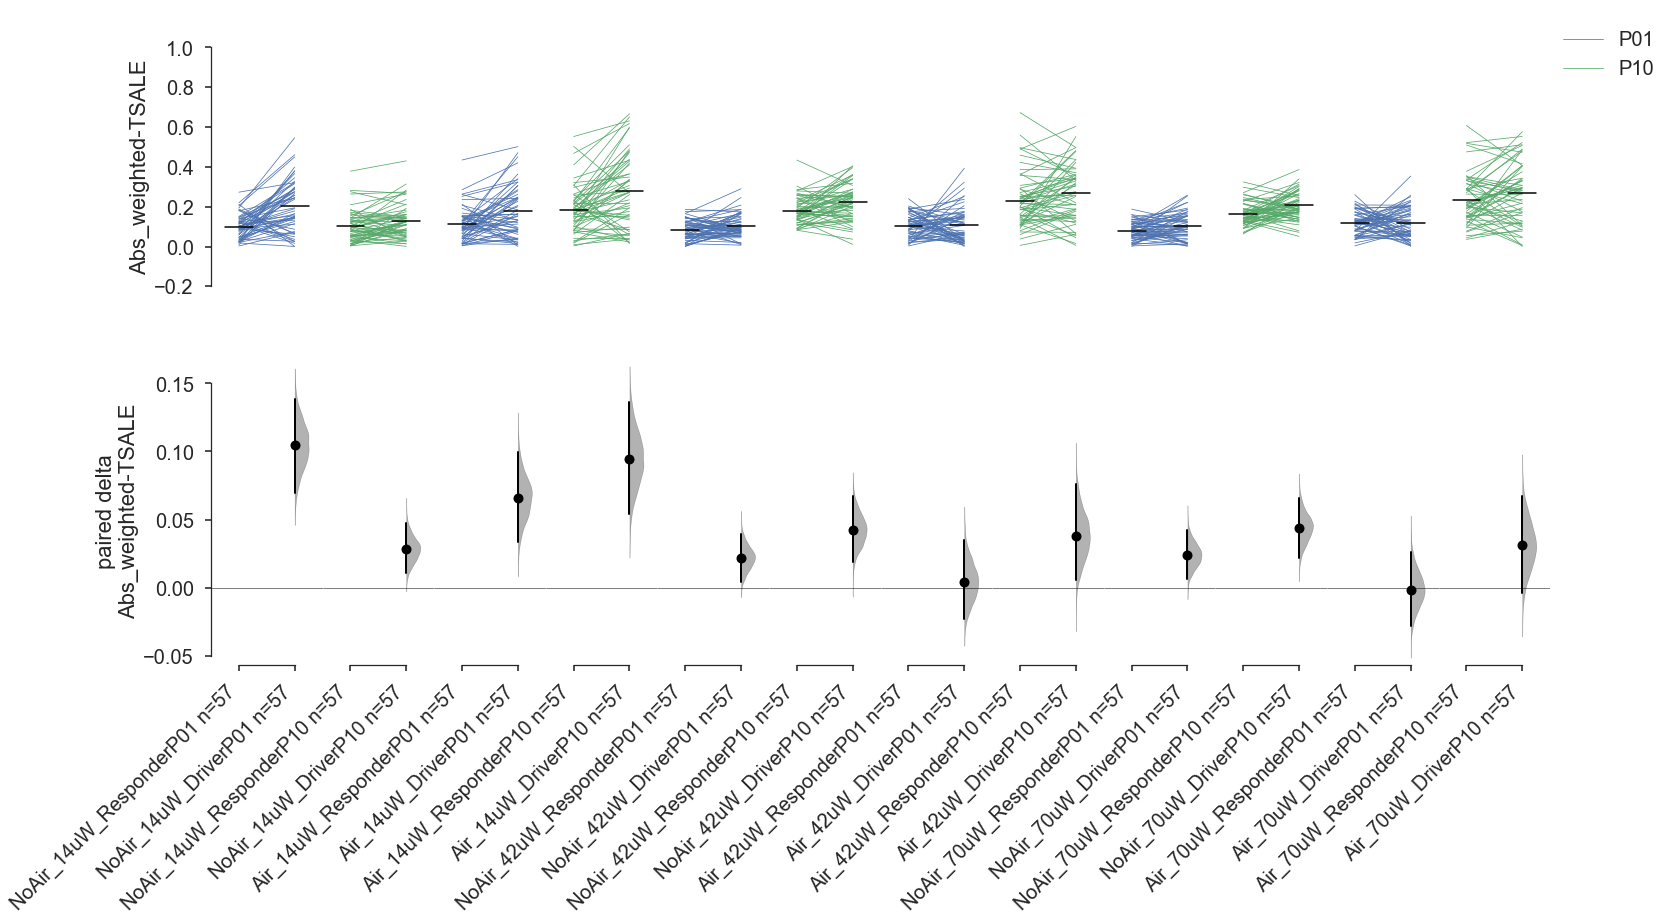

In [12]:
fig,b = bs.contrastplot(male_starved_total, x = 'Wind-Int-Status-Epoch', y = 'Abs_weighted-TSALE',
                                color_col= 'Epoch',
                         paired = True, fig_size=(24,12), 
                        float_contrast = False,
                              idx = (('NoAir_14uW_ResponderP01', 'NoAir_14uW_DriverP01'),
                                     ('NoAir_14uW_ResponderP10', 'NoAir_14uW_DriverP10'),
                                     ('Air_14uW_ResponderP01', 'Air_14uW_DriverP01'),
                                     ('Air_14uW_ResponderP10', 'Air_14uW_DriverP10'),
                                     ('NoAir_42uW_ResponderP01', 'NoAir_42uW_DriverP01'),
                                     ('NoAir_42uW_ResponderP10', 'NoAir_42uW_DriverP10'),
                                     ('Air_42uW_ResponderP01', 'Air_42uW_DriverP01'),
                                     ('Air_42uW_ResponderP10', 'Air_42uW_DriverP10'),
                                     ('NoAir_70uW_ResponderP01', 'NoAir_70uW_DriverP01'),
                                     ('NoAir_70uW_ResponderP10', 'NoAir_70uW_DriverP10'),
                                     ('Air_70uW_ResponderP01', 'Air_70uW_DriverP01'),
                                     ('Air_70uW_ResponderP10', 'Air_70uW_DriverP10'),
                                    ),
                       )
b

In [13]:
fname =  "male_starved" + '_' + 'Controls_paired'
fig.savefig("C:/Users/tumkayat/Desktop/WALi Figures/AnalysesofTheControl/BreakDowns/" + fname + ".pdf",dpi=1000,bbox_inches='tight')
b.to_csv("C:/Users/tumkayat/Desktop/WALi Figures/AnalysesofTheControl/BreakDowns/" + fname + ".csv")

### Responder vs Experiment

,reference_group,experimental_group,stat_summary,bca_ci_low,bca_ci_high,ci,is_difference,is_paired,pvalue_2samp_paired_ttest,pvalue_wilcoxon
0,NoAir_14uW_ResponderP01,NoAir_14uW_ExperimentP01,0.016388,-0.011223,0.047032,95.0,True,True,2.705161e-01,4.019075e-01
1,NoAir_14uW_ResponderP10,NoAir_14uW_ExperimentP10,0.024150,-0.005407,0.053875,95.0,True,True,1.130382e-01,1.426780e-01
2,Air_14uW_ResponderP01,Air_14uW_ExperimentP01,0.023479,-0.004879,0.053041,95.0,True,True,1.270086e-01,1.515409e-01
3,Air_14uW_ResponderP10,Air_14uW_ExperimentP10,0.092203,0.047336,0.137703,95.0,True,True,2.331139e-04,1.853274e-04
4,NoAir_42uW_ResponderP01,NoAir_42uW_ExperimentP01,0.020659,-0.003636,0.061477,95.0,True,True,2.102569e-01,8.894176e-01
5,NoAir_42uW_ResponderP10,NoAir_42uW_ExperimentP10,0.060670,0.030766,0.100620,95.0,True,True,1.261708e-03,1.205091e-03
6,Air_42uW_ResponderP01,Air_42uW_ExperimentP01,0.026008,-0.000436,0.058300,95.0,True,True,8.647805e-02,1.806464e-01
7,Air_42uW_ResponderP10,Air_42uW_ExperimentP10,0.056912,0.015626,0.099826,95.0,True,True,1.056578e-02,8.247120e-03
8,NoAir_70uW_ResponderP01,NoAir_70uW_ExperimentP01,0.018624,-0.003576,0.062458,95.0,True,True,2.296168e-01,5.808168e-01
9,NoAir_70uW_ResponderP10,NoAir_70uW_ExperimentP10,0.102044,0.072153,0.139319,95.0,True,True,1.916298e-07,5.927535e-07


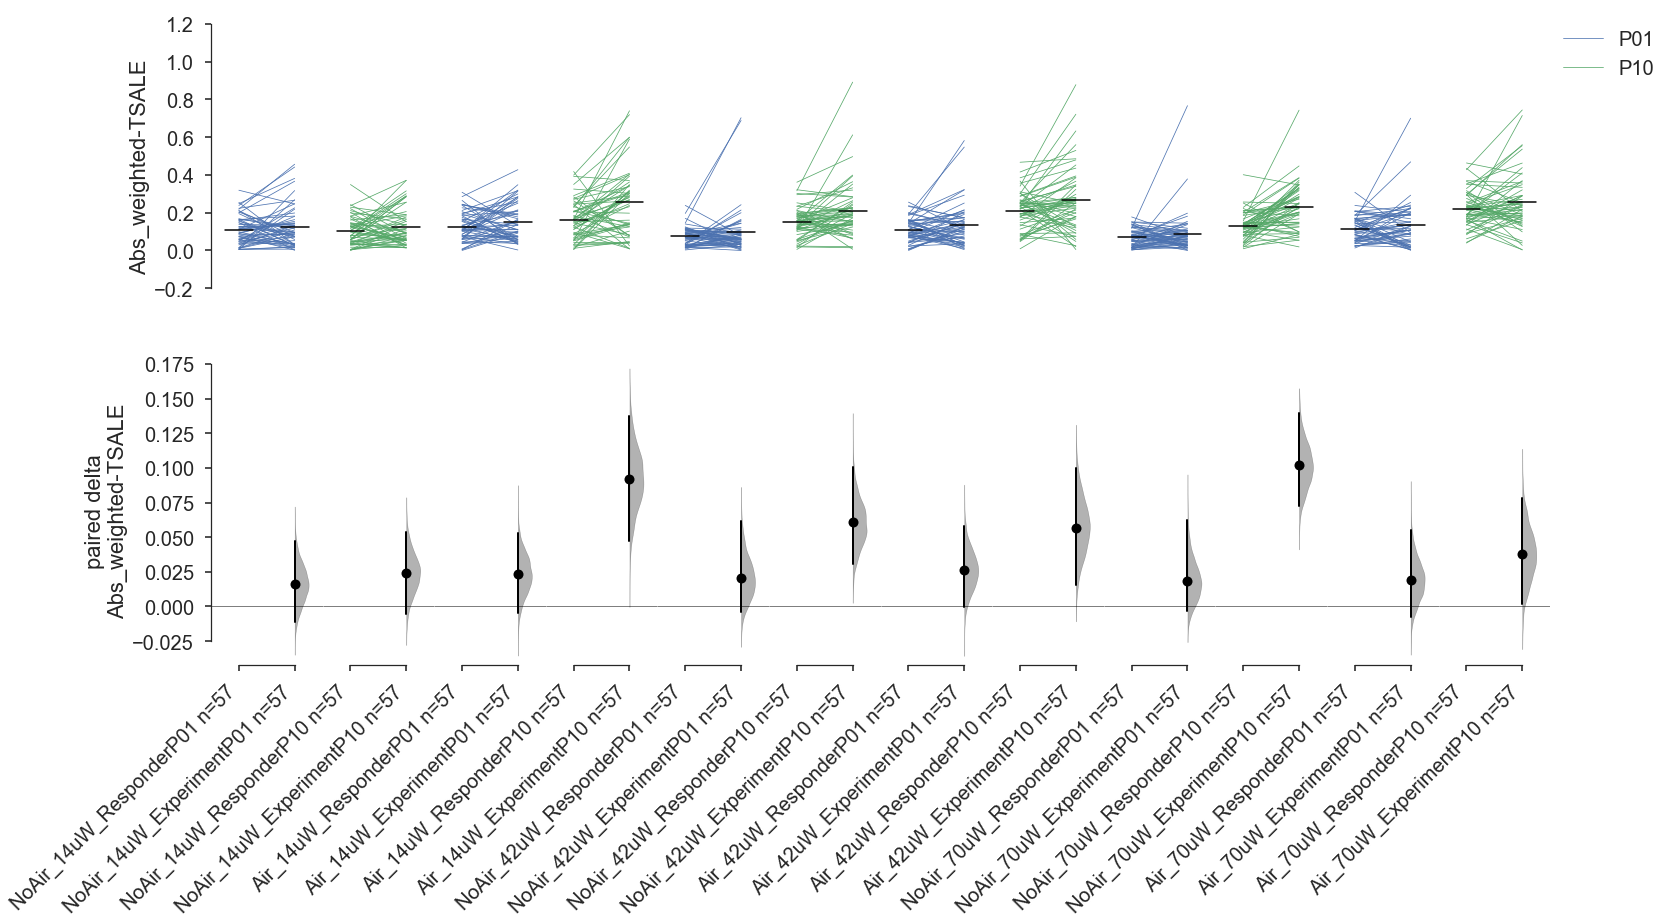

In [14]:
fig,b = bs.contrastplot(male_fed_total, x = 'Wind-Int-Status-Epoch', y = 'Abs_weighted-TSALE',
                                color_col= 'Epoch',
                         paired = True, fig_size=(24,12), 
                        float_contrast = False,
                              idx = (('NoAir_14uW_ResponderP01', 'NoAir_14uW_ExperimentP01'),
                                     ('NoAir_14uW_ResponderP10', 'NoAir_14uW_ExperimentP10'),
                                     ('Air_14uW_ResponderP01', 'Air_14uW_ExperimentP01'),
                                     ('Air_14uW_ResponderP10', 'Air_14uW_ExperimentP10'),
                                     ('NoAir_42uW_ResponderP01', 'NoAir_42uW_ExperimentP01'),
                                     ('NoAir_42uW_ResponderP10', 'NoAir_42uW_ExperimentP10'),
                                     ('Air_42uW_ResponderP01', 'Air_42uW_ExperimentP01'),
                                     ('Air_42uW_ResponderP10', 'Air_42uW_ExperimentP10'),
                                     ('NoAir_70uW_ResponderP01', 'NoAir_70uW_ExperimentP01'),
                                     ('NoAir_70uW_ResponderP10', 'NoAir_70uW_ExperimentP10'),
                                     ('Air_70uW_ResponderP01', 'Air_70uW_ExperimentP01'),
                                     ('Air_70uW_ResponderP10', 'Air_70uW_ExperimentP10'),
                                    ),
                       )
b

In [15]:
fname =  "male_starved" + '_' + 'Experiment_v_Control_paired'
fig.savefig("C:/Users/tumkayat/Desktop/WALi Figures/AnalysesofTheControl/BreakDowns/" + fname + ".pdf",dpi=1000,bbox_inches='tight')
b.to_csv("C:/Users/tumkayat/Desktop/WALi Figures/AnalysesofTheControl/BreakDowns/" + fname + ".csv")

### Sequential Paired

,reference_group,experimental_group,stat_summary,bca_ci_low,bca_ci_high,ci,is_difference,is_paired,pvalue_2samp_paired_ttest,pvalue_wilcoxon
0,NoAir_14uW_DriverP01,NoAir_14uW_DriverP10,-0.075784,-0.113207,-0.041612,95.0,True,True,1.760806e-04,6.072457e-04
1,NoAir_14uW_DriverP10,Air_14uW_DriverP01,0.047721,0.011842,0.082221,95.0,True,True,1.067808e-02,1.088282e-02
2,Air_14uW_DriverP01,Air_14uW_DriverP10,0.102178,0.048704,0.160130,95.0,True,True,7.440023e-04,1.077556e-03
3,Air_14uW_DriverP10,NoAir_42uW_DriverP01,-0.175417,-0.232863,-0.121524,95.0,True,True,4.048709e-08,5.927535e-07
4,NoAir_42uW_DriverP01,NoAir_42uW_DriverP10,0.119403,0.093536,0.149068,95.0,True,True,1.531092e-11,2.866906e-09
5,NoAir_42uW_DriverP10,Air_42uW_DriverP01,-0.113557,-0.142920,-0.079691,95.0,True,True,3.008478e-09,1.239750e-07
6,Air_42uW_DriverP01,Air_42uW_DriverP10,0.159608,0.122050,0.197938,95.0,True,True,5.128993e-11,1.309686e-08
7,Air_42uW_DriverP10,NoAir_70uW_DriverP01,-0.165160,-0.205566,-0.124256,95.0,True,True,6.831812e-11,1.138878e-08
8,NoAir_70uW_DriverP01,NoAir_70uW_DriverP10,0.102483,0.080525,0.125029,95.0,True,True,2.566348e-12,1.848951e-09
9,NoAir_70uW_DriverP10,Air_70uW_DriverP01,-0.088328,-0.112876,-0.060433,95.0,True,True,2.412003e-08,7.894936e-07


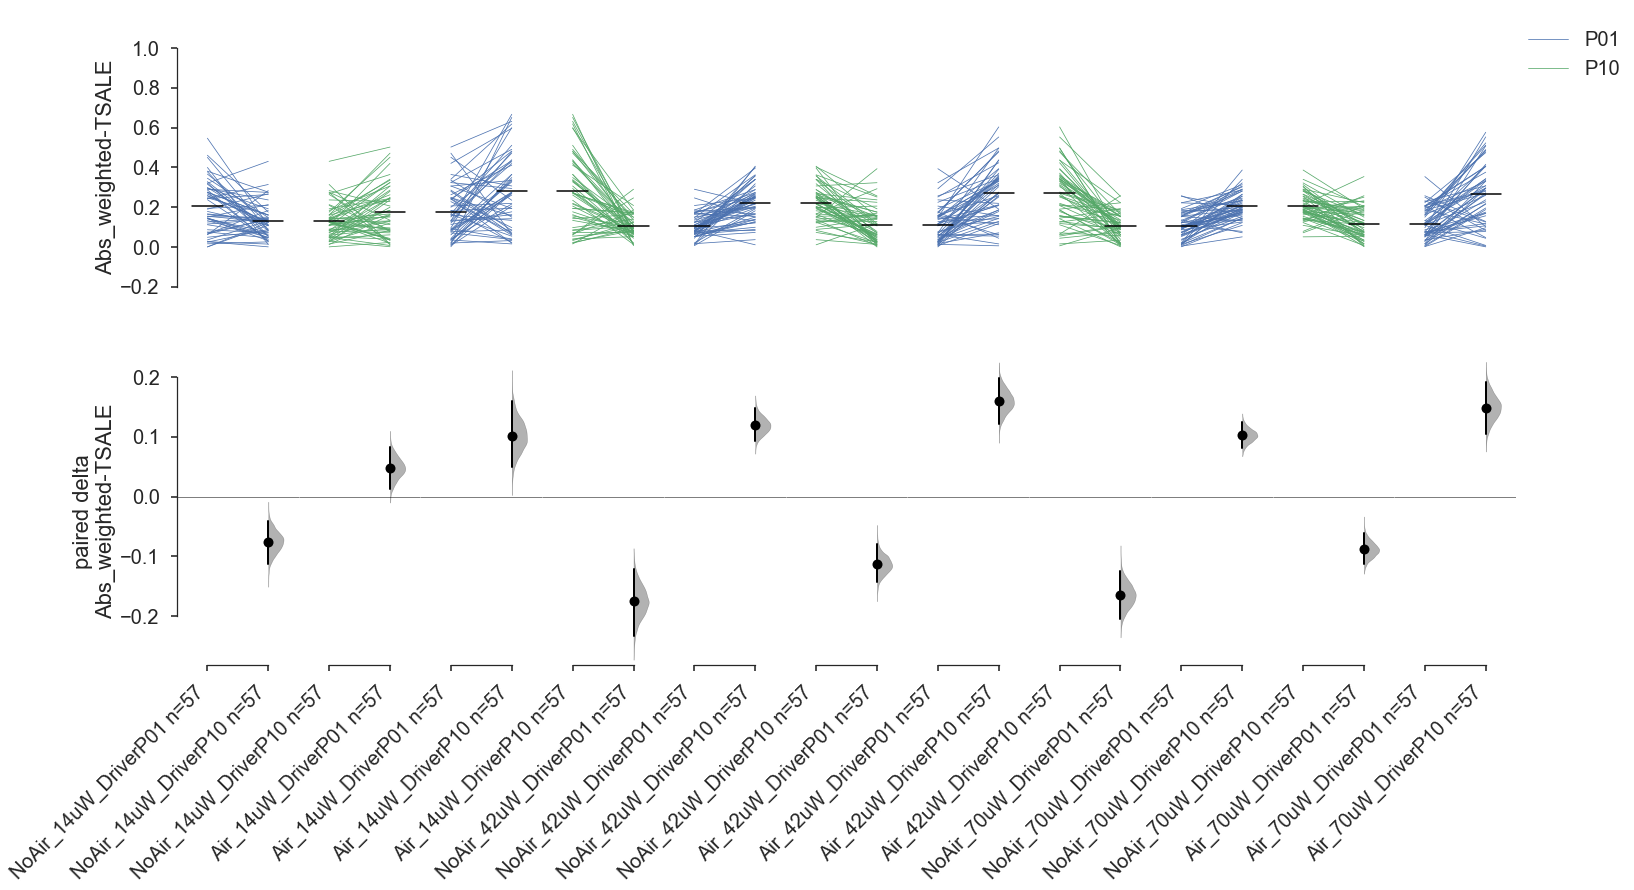

In [21]:
fig,b = bs.contrastplot(male_starved_total, x = 'Wind-Int-Status-Epoch', y = 'Abs_weighted-TSALE',
                                color_col= 'Epoch',
                         paired = True, fig_size=(24,12), 
                        float_contrast = False,
                              idx = (('NoAir_14uW_DriverP01', 'NoAir_14uW_DriverP10'),
                                     ('NoAir_14uW_DriverP10', 'Air_14uW_DriverP01'),
                                     ('Air_14uW_DriverP01', 'Air_14uW_DriverP10'),
                                     ('Air_14uW_DriverP10', 'NoAir_42uW_DriverP01'),
                                     ('NoAir_42uW_DriverP01', 'NoAir_42uW_DriverP10'),
                                     ('NoAir_42uW_DriverP10', 'Air_42uW_DriverP01'),
                                     ('Air_42uW_DriverP01', 'Air_42uW_DriverP10'),
                                     ('Air_42uW_DriverP10', 'NoAir_70uW_DriverP01'),
                                     ('NoAir_70uW_DriverP01', 'NoAir_70uW_DriverP10'),
                                     ('NoAir_70uW_DriverP10', 'Air_70uW_DriverP01'),
                                     ('Air_70uW_DriverP01', 'Air_70uW_DriverP10'),
                                     
                                    ),
                       )
b

In [22]:
fname =  "male_starved" + '_' + 'Driver_SeqPaired'
fig.savefig("C:/Users/tumkayat/Desktop/WALi Figures/AnalysesofTheControl/BreakDowns/" + fname + ".pdf",dpi=1000,bbox_inches='tight')
b.to_csv("C:/Users/tumkayat/Desktop/WALi Figures/AnalysesofTheControl/BreakDowns/" + fname + ".csv")

# A generic delta-delta plot function

## Figure 2.9 (Orco v Orco-rut)

In [21]:
Orco_EffectSizes_df = pd.read_csv("C:/Users/tumkayat/Desktop/WALiAnalyses/OrcoVOrcoRut/Orco/ORCO_weighted_TSALE_CombinedControls_P10_male-combined_fed_NoAir.csv")
Orco_rut_EffectSizes_df = pd.read_csv("C:/Users/tumkayat/Desktop/WALiAnalyses/OrcoVOrcoRut/Orco-rut/weighted_TSALE_CombinedControls_P10_Fed_NoAir_Constant.csv")

In [68]:
Orco_EffectSizes_df

,Unnamed: 0,reference_group,experimental_group,SummaryES,CI_LB,CI_UB,ci,is_difference,is_paired,pvalue_2samp_ind_ttest,pvalue_mannWhitney,Sample_size,Standart_dev
0,0,Parent_male-combined_fed_14uW_NoAir,Offspring_male-combined_fed_14uW_NoAir,0.052353,-0.094407,0.194888,95,True,False,0.471115,0.542438,250,0.55
1,1,Parent_male-combined_fed_42uW_NoAir,Offspring_male-combined_fed_42uW_NoAir,0.289947,0.159461,0.414381,95,True,False,0.000012,0.000005,250,0.48
2,2,Parent_male-combined_fed_70uW_NoAir,Offspring_male-combined_fed_70uW_NoAir,0.272716,0.140487,0.401792,95,True,False,0.000062,0.000040,250,0.50


In [69]:
(0.003254 - 0.052353) / 0.052353

-0.937845013657288

In [81]:
def deltadeltaPlot(df_ctrl, df_exp):
    contrast_means = []
    contrast_CI_LB = []
    contrast_CI_UB = []
    contrast_samplesize = []
    contrast_STD = []

    for i in range(len(df_ctrl)):
        mean_ctrl = df_ctrl['SummaryES'][i]
        mean_exp = df_exp['SummaryES'][i]

        N_ctrl = df_ctrl['Sample_size'][i]
        N_exp = df_exp['Sample_size'][i]

        STD_ctrl = df_ctrl['Standart_dev'][i]
        STD_exp = df_exp['Standart_dev'][i]

        mean_diff = (mean_exp - mean_ctrl) / mean_ctrl
        STD_pooled = np.sqrt(((N_ctrl-1) * (STD_ctrl**2) + (N_exp-1)*(STD_exp**2)) / float((N_ctrl+N_exp-2)))
        #http://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_confidence_intervals/bs704_confidence_intervals5.html

        moe = 1.96 * STD_pooled * np.sqrt((1./N_ctrl)+(1./N_exp))
        CI_LB = mean_diff - moe
        CI_UB = mean_diff + moe

        contrast_means.append(mean_diff)
        contrast_CI_LB.append(CI_LB)
        contrast_CI_UB.append(CI_UB)
        contrast_samplesize.append((N_ctrl + N_exp)/2.)
        contrast_STD.append(STD_pooled)
        
        stats_table = {'Sample_size':contrast_samplesize,'Standart_dev':contrast_STD, 'SummaryES':contrast_means, 'CI_LB':contrast_CI_LB, 'CI_UB':contrast_CI_UB}
        stats_table_df = pd.DataFrame.from_dict(stats_table)
        
    ## import the libraries, set some parameters
    import itertools
    from matplotlib.lines import Line2D
    import scipy.stats

    style='ticks'
    context='notebook'
    font='Arial'

    sns.set(style=style,context =context,font=font)

    fig1 = plt.figure(figsize=(10,4))
    ax1 = fig1.add_subplot(111)

    ## plotting the mean dots , zorder specifies the layer order - i.e dots are in the front
    x1 = 1
    for i in range(len(contrast_means)):
        ax1.scatter(x1, contrast_means[i], s=90, c='k',zorder=10)
        ax1.plot([x1,x1], [contrast_CI_LB[i], contrast_CI_UB[i]], color='k', lw=1)
        x1 = x1 + 1

#     ax1.set_ylim(-1,1)
    ax1.set_ylabel('delta-delta wTSALE')
    ax1.set_xticks(np.arange(1,len(df_ctrl)+1))
    xlabel = []
    for c in df_ctrl['reference_group']:
        xlabel.append(c[7:])
        ax1.set_xticklabels(xlabel,rotation=45)
        
#     ax1.legend(custom_lines, legend_labels,bbox_to_anchor=(1, 1))
    plt.axhline(color='k', linewidth = '0.5')
    sns.despine()
    return fig1, stats_table_df

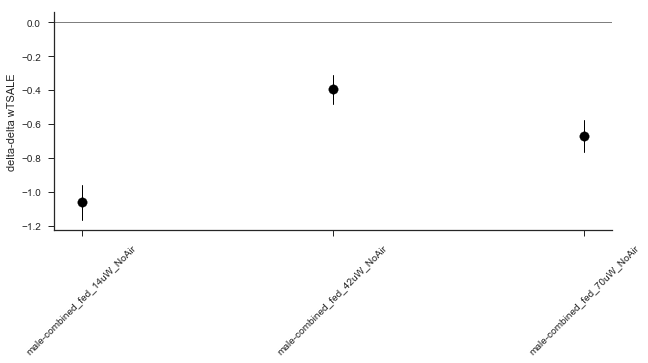

In [82]:
fig,c = deltadeltaPlot(Orco_EffectSizes_df, Orco_rut_EffectSizes_df)

In [83]:
fname = 'Orco_v_OrcoRUT_percent'
fig.savefig("C://Users//tumkayat/Desktop/" + fname + ".pdf",dpi=1000,bbox_inches='tight')
c.to_csv("C://Users//tumkayat/Desktop/" + fname + ".csv")

In [84]:
c

,CI_LB,CI_UB,Sample_size,Standart_dev,SummaryES
0,-1.164928,-0.959372,203.0,0.513939,-1.062150
1,-0.484709,-0.309580,203.0,0.437866,-0.397144
2,-0.765015,-0.579358,203.0,0.464188,-0.672187
